# Income Classification Model
## Introduction
The income dataset was extracted from 1994 U.S. Census database.

## The importance of census statistics
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

## Objective of the porject
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

## Features Description
1. Categorical Attributes

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

sex: Female, Male.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

2. Continuous Attributes

age: continuous.
Age of an individual

fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.
Individual's working hour per week

# Fetching Data from source

# 1. Import packages from python library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# 2. Import data

In [2]:
census = pd.read_csv("/content/drive/MyDrive/python Datasets/adult.csv")

In [3]:
census

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

# EDA

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
census.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
census.notna().count()

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [7]:
 census[census == '?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
census.replace('?', np.nan, inplace = True)

In [9]:
 census[census == '?'].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
census.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
census.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [12]:
census.describe(include='O').T

count unique                 top   freq
workclass       46043      8             Private  33906
education       48842     16             HS-grad  15784
marital-status  48842      7  Married-civ-spouse  22379
occupation      46033     14      Prof-specialty   6172
relationship    48842      6             Husband  19716
race            48842      5               White  41762
gender          48842      2                Male  32650
native-country  47985     41       United-States  43832
income          48842      2               <=50K  37155

In [13]:
census['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [14]:
#Alternate method
#census['income'] = np.where(census['income'] == '>50K', 0, census['income'])


In [15]:
census['income'] = census['income'].map({'<=50K':0 ,'>50K':1})

In [16]:
census['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

# Summary

# 3.1 Summary statistics for numeric attribute

In [17]:
census_num = census.drop(['educational-num','income'],axis =1 )
census_num.describe()

age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  48842.000000  48842.000000    48842.000000
mean      38.643585  1.896641e+05   1079.067626     87.502314       40.422382
std       13.710510  1.056040e+05   7452.019058    403.004552       12.391444
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.175505e+05      0.000000      0.000000       40.000000
50%       37.000000  1.781445e+05      0.000000      0.000000       40.000000
75%       48.000000  2.376420e+05      0.000000      0.000000       45.000000
max       90.000000  1.490400e+06  99999.000000   4356.000000       99.000000

Summary of attributes explain following things:
>  **For Age :**
1.  The mean value is 38 i.e. on an average the value of age attribute is 38.
2.  Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.    
3.  The value of Age attribute varies from 17 to 90.
4.  The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5.  3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
6.  The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
7.  The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.


>  **For fnlwgt :**
1.  This is the sampling weight corresponding to the observations.
2.  finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.


> **For capital-gain :**
1.  For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
2.  From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
3.  capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
4.  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).


> **For capital-loss :**
1.  This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
2.  Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).


> **For hours-per-week :**
1.  This attribute means number of working hours spend by an individual in a week.
2.  In this data the hours per week atrribute varies within the range of 1 to 99.
3.  75 percentage of the people spend 45 or less working hours per week.
4.  The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
5.  Observations are very sparse below 25th percentile and after 75th percentile.
6.  Using quartiles we can say that data is approximately symmetric.
4.  Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.

# 3.2 Summary and count for categorical attribute

In [18]:
census_num.describe(include= 'O')

workclass education      marital-status      occupation relationship  \
count      46043     48842               48842           46033        48842   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race gender native-country  
count   48842  48842          47985  
unique      5      2             41  
top     White   Male  United-States  
freq    41762  32650          43832

In [19]:
census['occupation'].nunique()

14

* Native-country has maximum number of unique categories i.e. 41 categories.
* But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).
* Occupation has  more or less uniform distribution of categories as comparerd to the other attributes.
* Race is also biased to the white race category(38903) with 85.5%.
* The top category in workclass is Private having frequency(36705) and percentage(75.5%).

# 4 EDA

**Univariate analysis**

4.1 Age

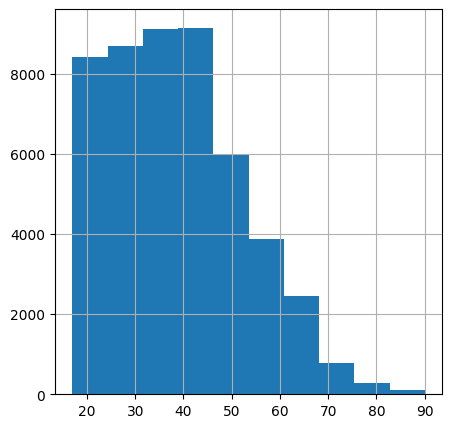

In [20]:
census['age'].hist(figsize=(5,5))
plt.show()

In [21]:
census[census['age']>70].shape

(868, 15)

***Description of the distribution***

The above histogram shows that :
* "age" attribute is not symmetric.
*  it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
*  Minimum and Maximum age of the people is 17 and 90 respectively.
*  This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

4.2 Hours per week

<Axes: >

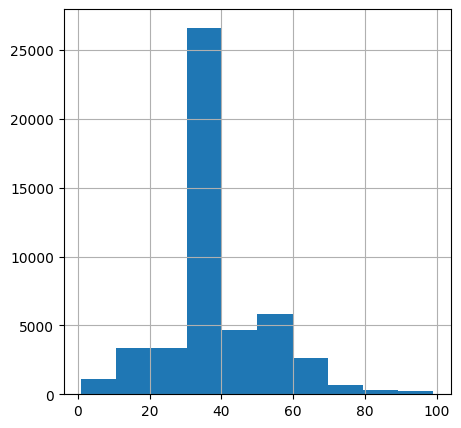

In [22]:
census['hours-per-week'].hist(figsize=(5,5))

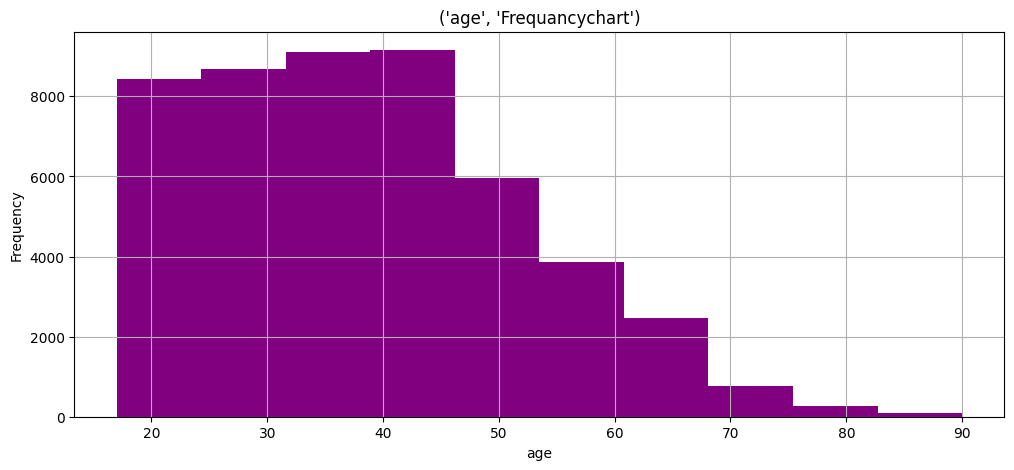

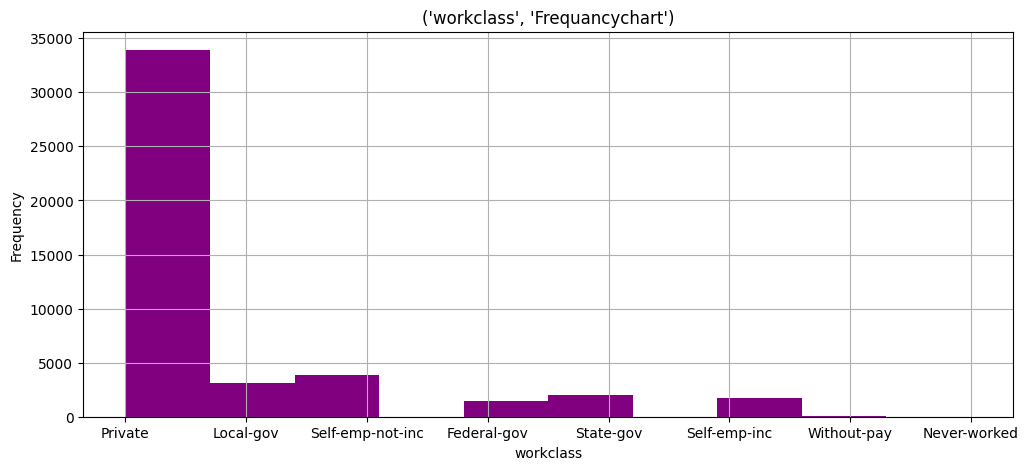

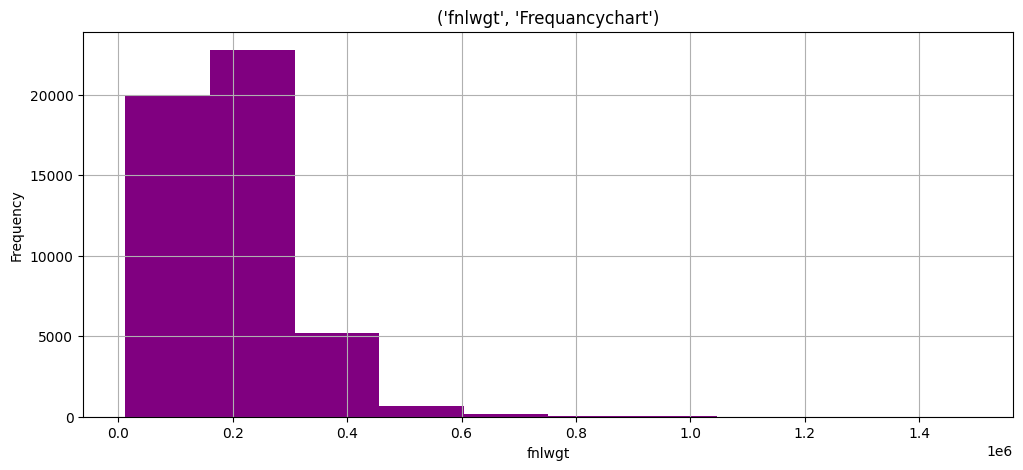

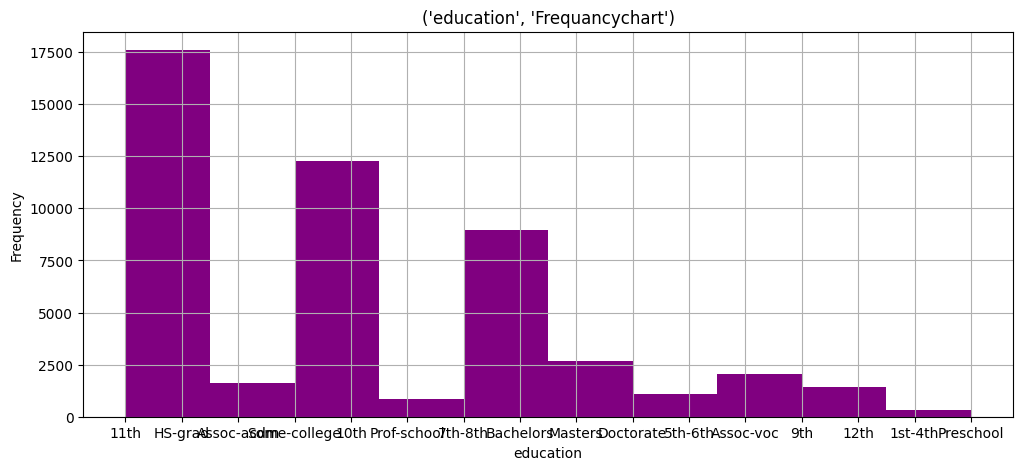

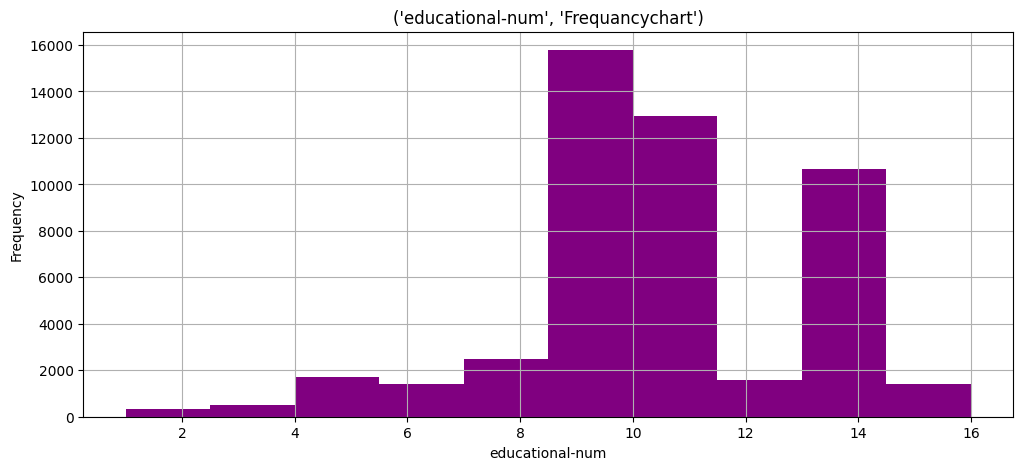

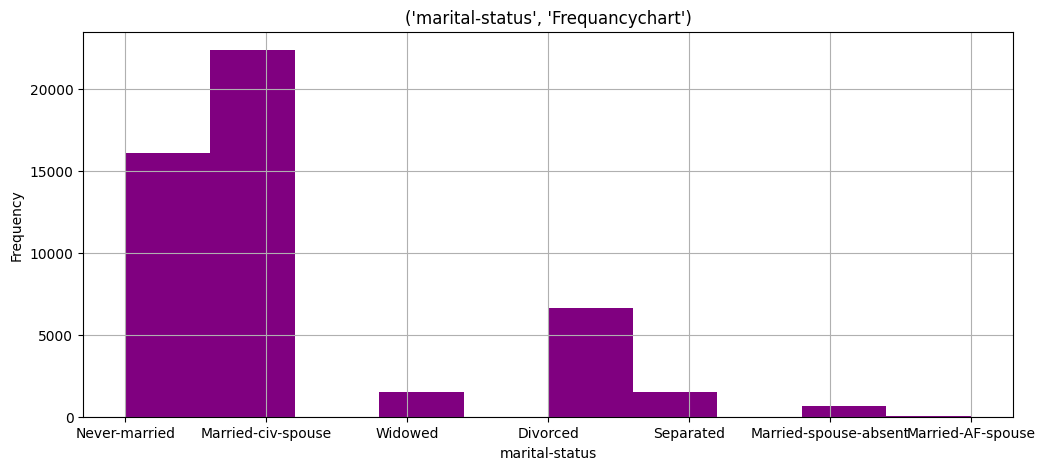

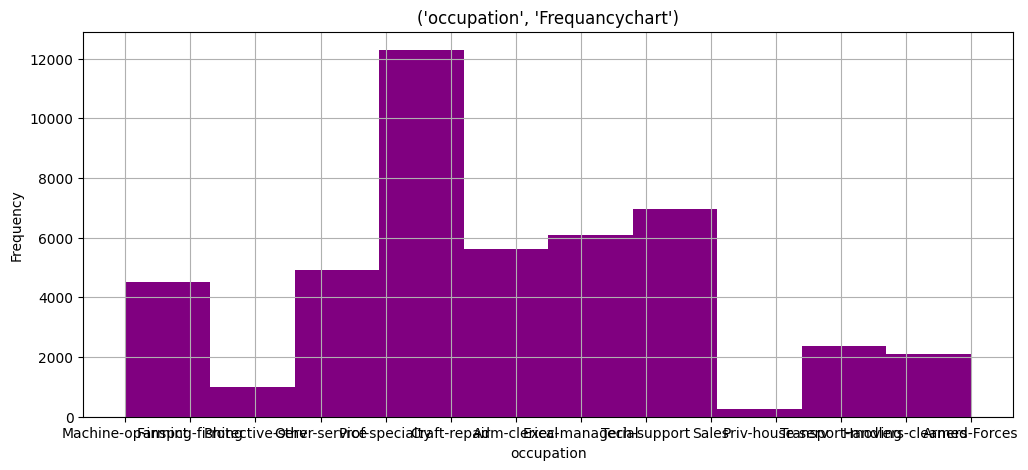

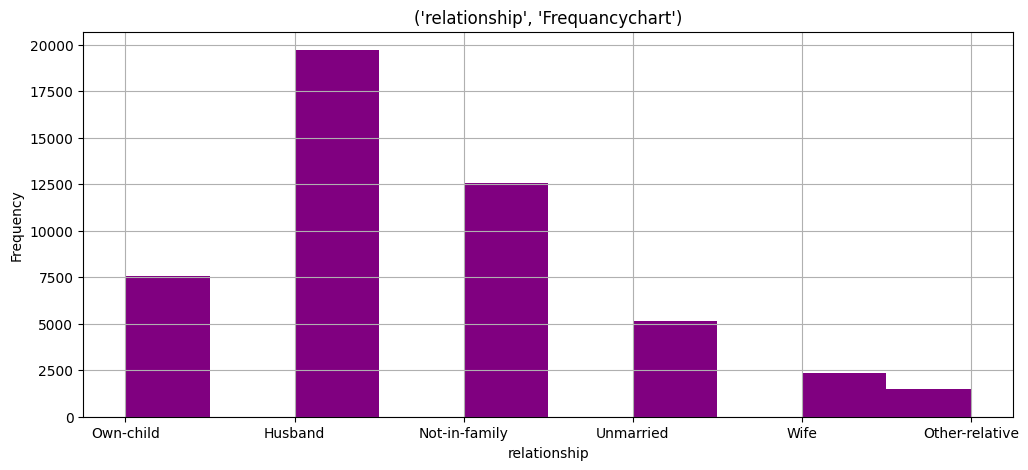

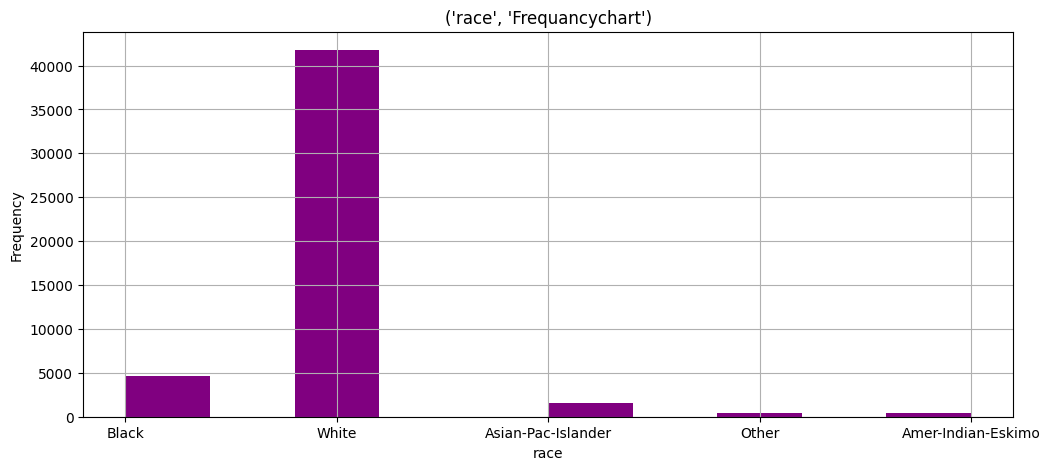

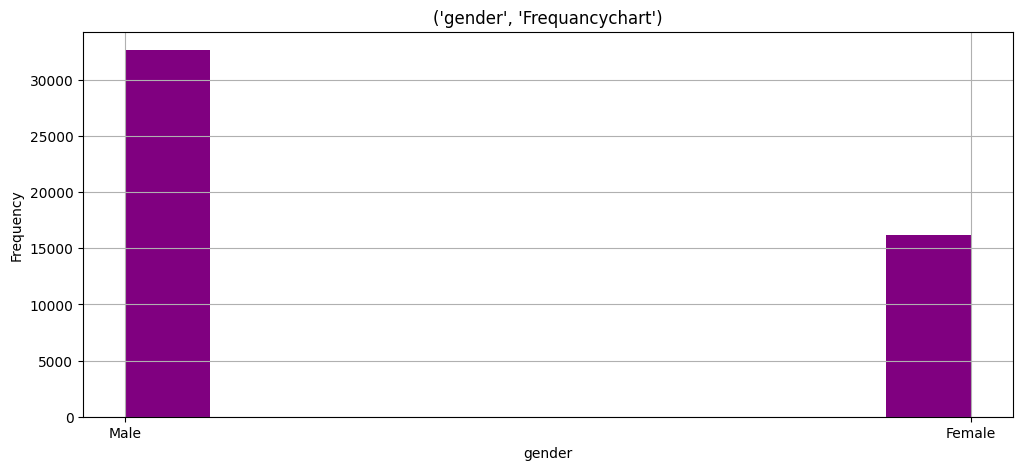

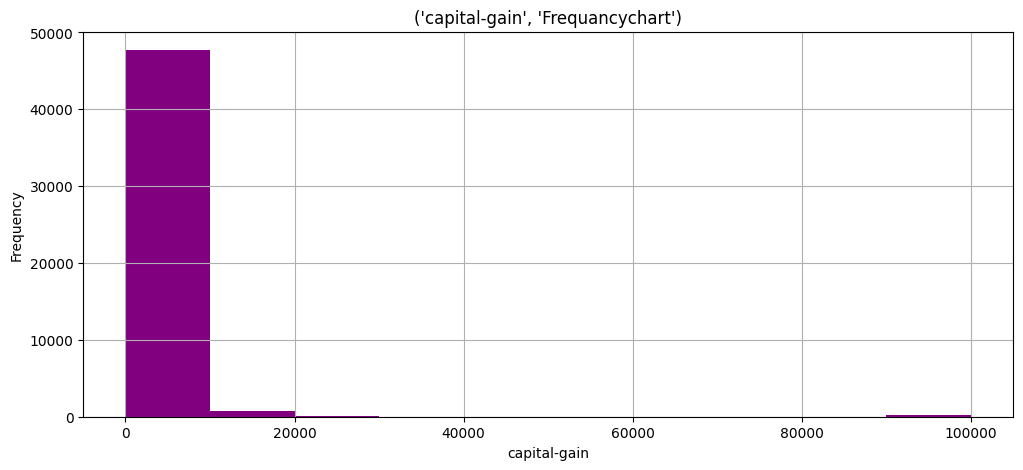

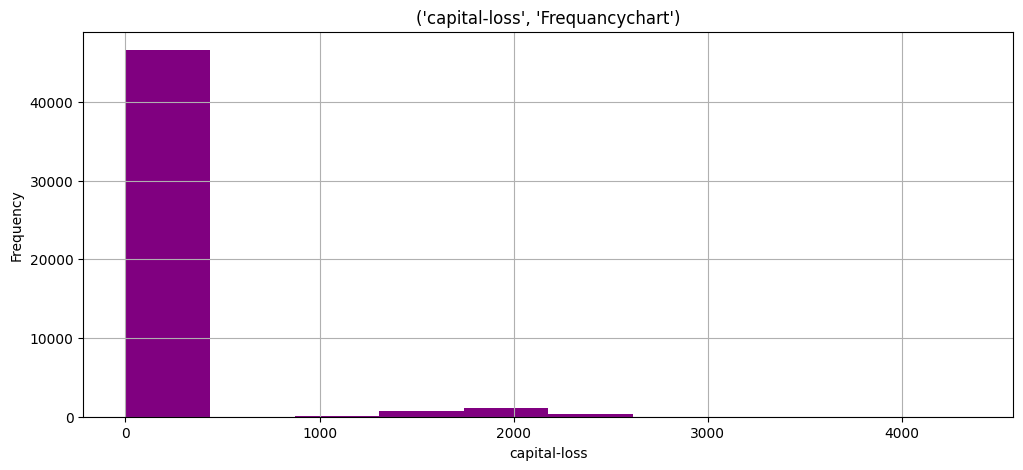

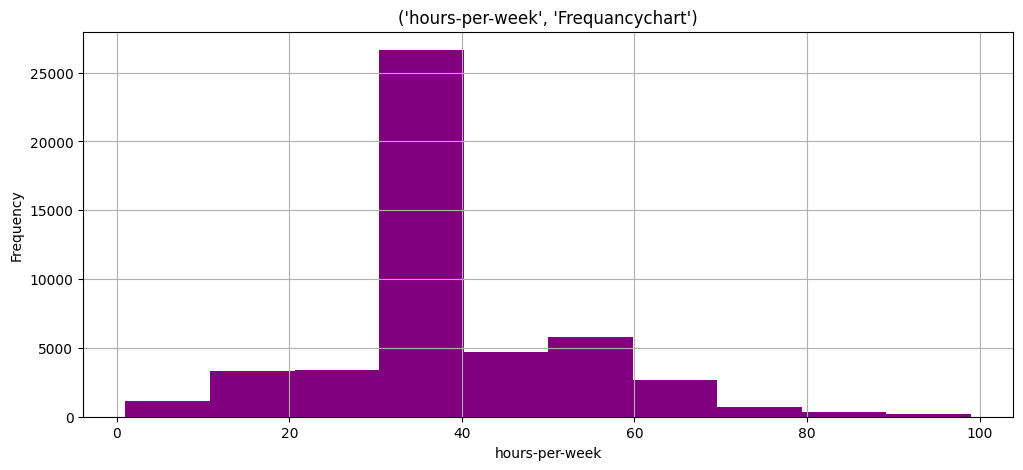

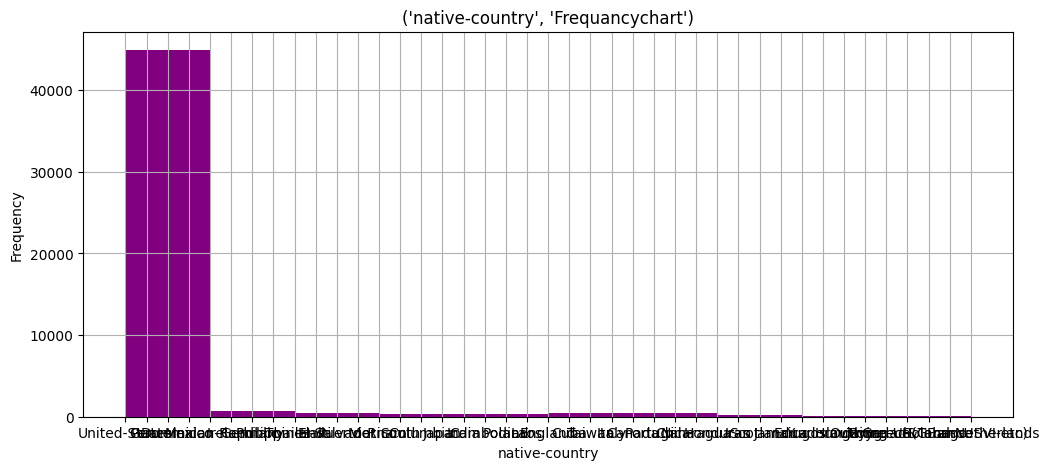

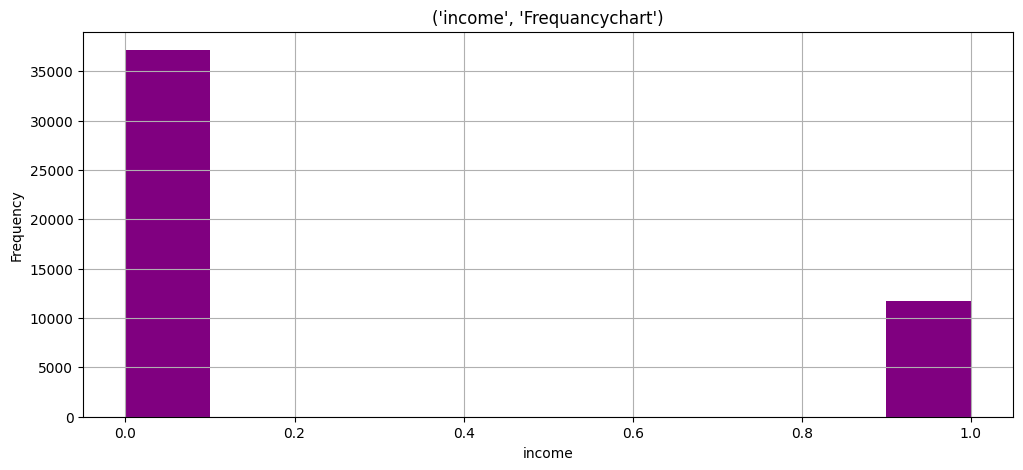

In [23]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink']
for i in census.columns:
 census[i].hist(figsize=(12,5),color = 'purple')
 plt.title((i,'Frequancychart'))
 plt.xlabel(i)
 plt.ylabel('Frequency')
 plt.show()

**Description of the distribution**


1. **Workclass:**
    * The majority of individuals in the dataset belong to the "Private" workclass category.
    * There is a significant drop in the number of individuals in the "Self-emp-not-inc" and "Self-emp-inc" categories.
    * The "Without-pay" and "Never-worked" categories have the least number of individuals.
2. **Education:**
    * The "HS-grad" category has the highest number of individuals, followed by "Some-college" and "Bachelors".
    * The "Preschool" and "1st-4th" categories have the least number of individuals.
    * There is a gradual decrease in the number of individuals as the level of education increases.
3. **Marital-status:**
    * The "Married-civ-spouse" category has the highest number of individuals, followed by "Never-married" and "Divorced".
    * The "Separated" and "Widowed" categories have the least number of individuals.
    * The number of individuals in the "Married-civ-spouse" category is significantly higher than in the other categories.

4. **Occupation:**
    * The "Prof-specialty" category has the highest number of individuals, followed by "Craft-repair" and "Exec-managerial".
    * The "Farming-fishing" and "Protective-serv" categories have the least number of individuals.
    * There is a wide range in the number of individuals across different occupation categories.

5. **Relationship:**
    * The "Husband" category has the highest number of individuals, followed by "Not-in-family" and "Own-child".
    * The "Other-relative" and "Unmarried" categories have the least number of individuals.
    * The number of individuals in the "Husband" category is significantly higher than in the other categories.

6. **Race:**
    * The "White" category has the highest number of individuals, followed by "Black" and "Asian-Pac-Islander".
    * The "Amer-Indian-Eskimo" and "Other" categories have the least number of individuals.
    * The number of individuals in the "White" category is significantly higher than in the other categories.

7. **Sex:**
    * The "Male" category has the highest number of individuals, followed by "Female".
    * The number of individuals in the "Male" category is significantly higher than in the "Female" category.

8. **Native-country:**
    * The "United-States" category has the highest number of individuals, followed by "Mexico" and "Philippines".
    * The "Trinadad&Tobago" and "Yugoslavia" categories have the least number of individuals.
    * The number of individuals in the "United-States" category is significantly higher than in the other categories.

9. **Income:**
    * The "<=50K" category has the highest number of individuals, followed by ">50K".
    * The number of individuals in the "<=50K" category is significantly higher than in the ">50K" category.

**hours-per-week**

This histogram of "hours-per-week" shows that:
* In this data the hours per week atrribute varies within the range of 1 to 99.
* Most people work 30-40 hours per week, they are roughly 27,000 people.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
*  75 percentage of the people spend 45 or less working hours per week.

Capital Gain


* This histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
*  capital-gain is concentrated on the one particular value and other are spread with  large standard deviation(7452.01).
*  capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

***Description of the distribution***

# 4.3 fnlwgt

fnlwght variable may stand for a weight of an observation

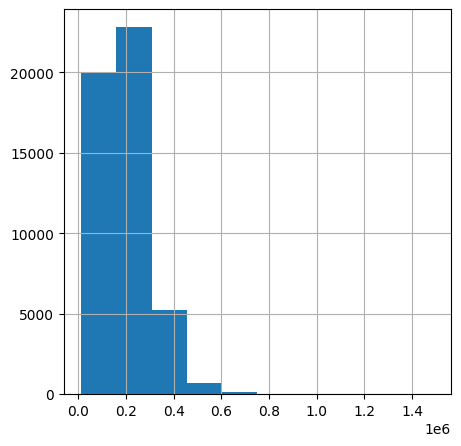

In [24]:
census['fnlwgt'].hist(figsize=(5,5))
plt.show()

The above histogram shows that :
* This is the sampling weight corresponding to the observations.
* The distribution of finalweight seems to be rightly skewed since mean(189664.1) is greater than median(178144.5).

# **Relation between capital gain and capital loss**

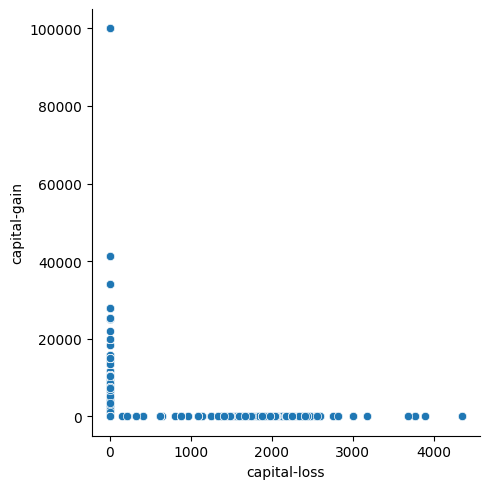

In [25]:
sns.relplot(x = 'capital-loss', y = 'capital-gain',data = census)
plt.show()

Possibilities for capital gain and capital loss

*     Both capital gain and capital loss can be zero
*     If capital.gain is zero there is possibility of capital loss being high or above zero.
*     If capital loss is zero there is possibility of capital.gain being high or above zero.



**With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])**

In [26]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink']

# Workclass Distribution

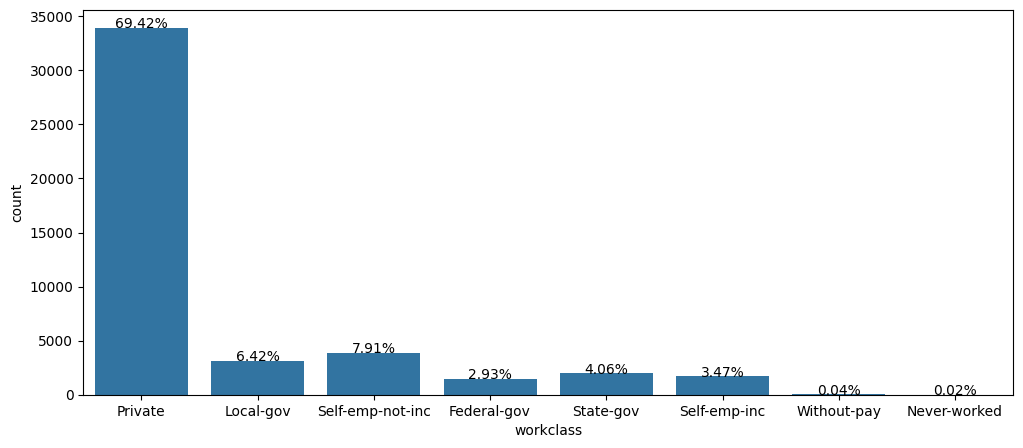

In [27]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
ax = sns.countplot(x="workclass", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")


Summary  distribution shows that:
* There are 8 unique categories present in the worclass attribute.
* Most of them belong to the *private* workclass(36705) i.e. 75.15%.
* *without-pay* and *never-worked* has minimum count in workclass attribute(less than 1%).
* There is huge imbalance in the categories of workclass attribute.

# Gender Distribution

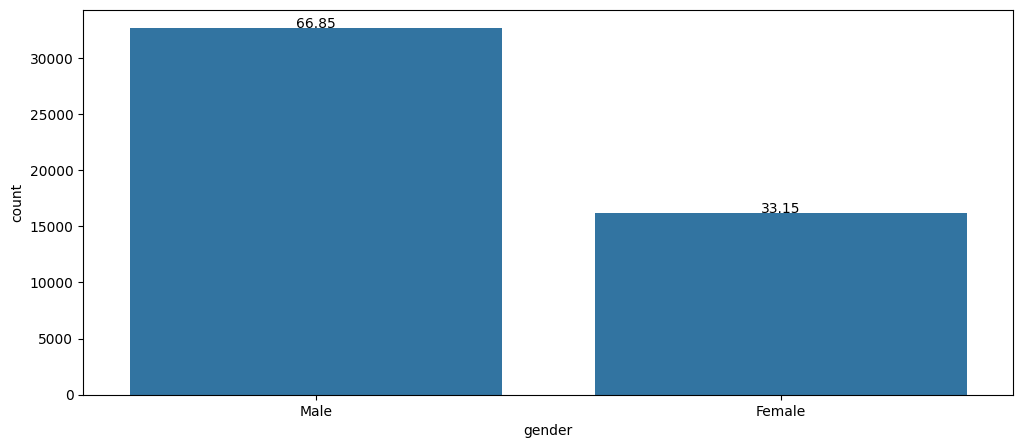

In [28]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="gender", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")

 **Description about distribution**


This distribution explains that:
* Gender has 2 unique categories(male and female).
* But the frequency of *male*(32650) is higher than the *female*(16192) categories.
* Distribution shows that this dataset is skewed toward the male with nearly 67%.

# Relationship Distribution

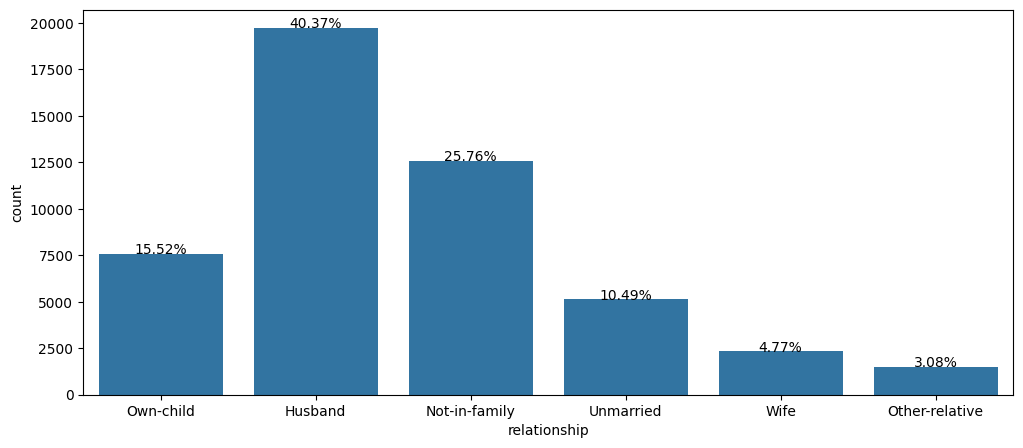

In [29]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
ax = sns.countplot(x="relationship", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")


 **Description about distribution**



* There are 6 unique categories in the **relationship** attribute.
* *Husband* has maximum percentage (40.37%) among all categories followed by *not-in-family*(25.76%)

# Education Distribution

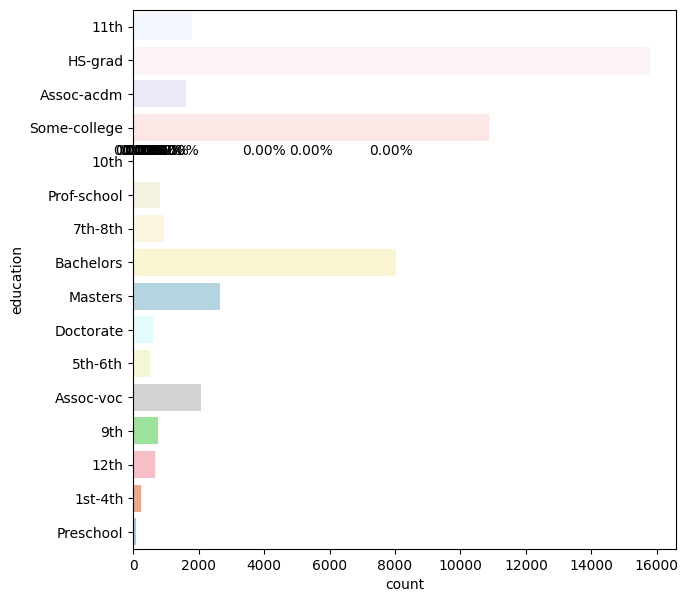

In [30]:
plt.figure(figsize = (7,7))
total=float(len(census['income']))
colors=["aliceblue", "lavenderblush", "lavender", "mistyrose", "white", "beige", "cornsilk", "lemonchiffon", "lightblue", "lightcyan", "lightgoldenrodyellow", "lightgray", "lightgreen", "lightpink", "lightsalmon", "lightskyblue", "lightsteelblue", "lightyellow"]
["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
ax = sns.countplot(y="education", data=census,palette =colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

Description about distribution


* There are 16 unique categories present in the **education** attribute.
* *Hs-grad* has 32.32% of all the education attribute.
* *HS-grad* (15784) has the maximum number of observations followed by *some-college*(10878) and *Bachelors*(8025).
* *Pre-school* has minimum samples i.e. 83.


# Race Distribution

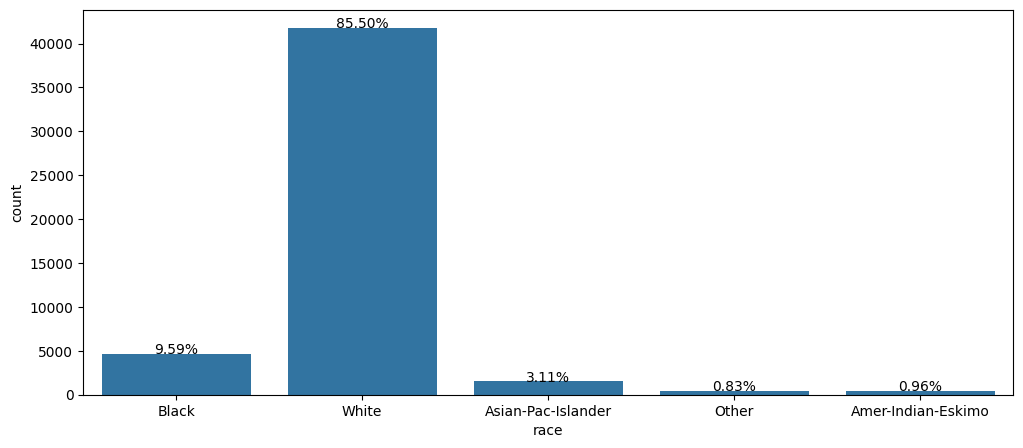

In [31]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="race", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

 **Description about distribution**


This distribution explains that:
* There are 5 unique categories in the **race** attribute.
* Most of them are "white" which is roughly 85.50%.
* This dataset is totally bias toward the "white" race.
* Second major race in the dataset is the "black" with just 9.59%.

# Occupation Distribution

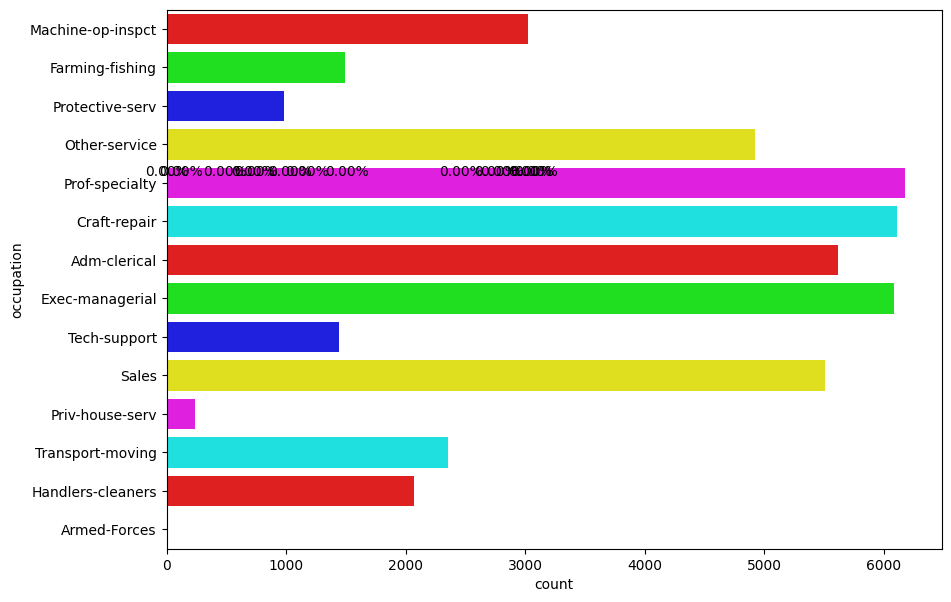

In [32]:
plt.figure(figsize = (10,7))
total=float(len(census['income']))
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
ax = sns.countplot(y="occupation", data=census,palette=colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

 **Description about distribution**



* There are 14 unique categories present in the **occupation** attribute.
* *Prof-specialty* has the maximum count(8981) but *Craft-repair*, *Exec-managerial* and *Adm-clerical Sales* has comparable number of observations.
* *Armed-Forces * has minimum samples in the **occupation** attribute.

# Marital-status Distribution

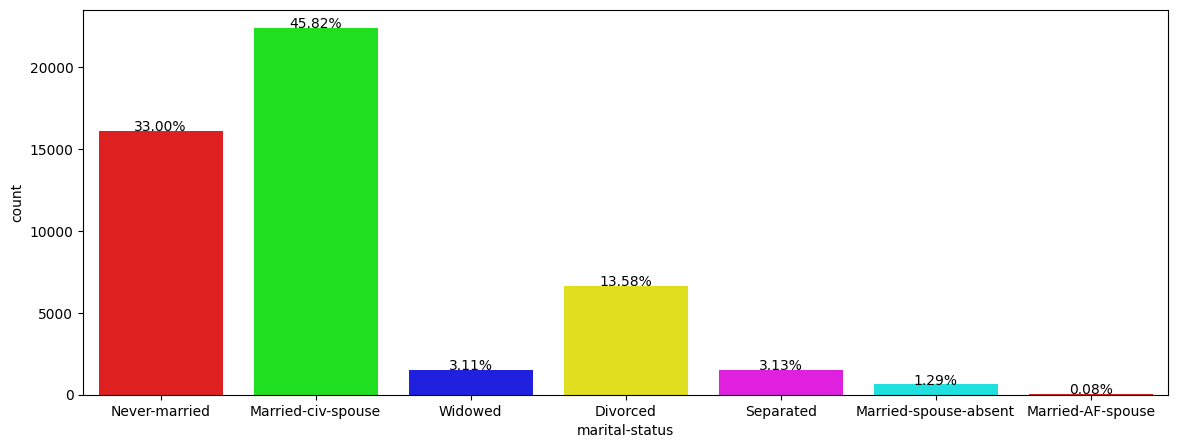

In [33]:
plt.figure(figsize = (14,5))
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
total=float(len(census['income']))
ax = sns.countplot(x="marital-status", data=census, palette = colors)
for p in (ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

 **Description about distribution**



* This *marital-status* attribute has 7 unique categories.
* Two of them are dominate over other categories(these are *Never-married*(33%) and *married-civ-spouse*(45.82%).
* *Married-civ-spouse* has maximum number of samples.
* *Married-AF-spouse* has minimum number of obs.


# Native-country Distribution

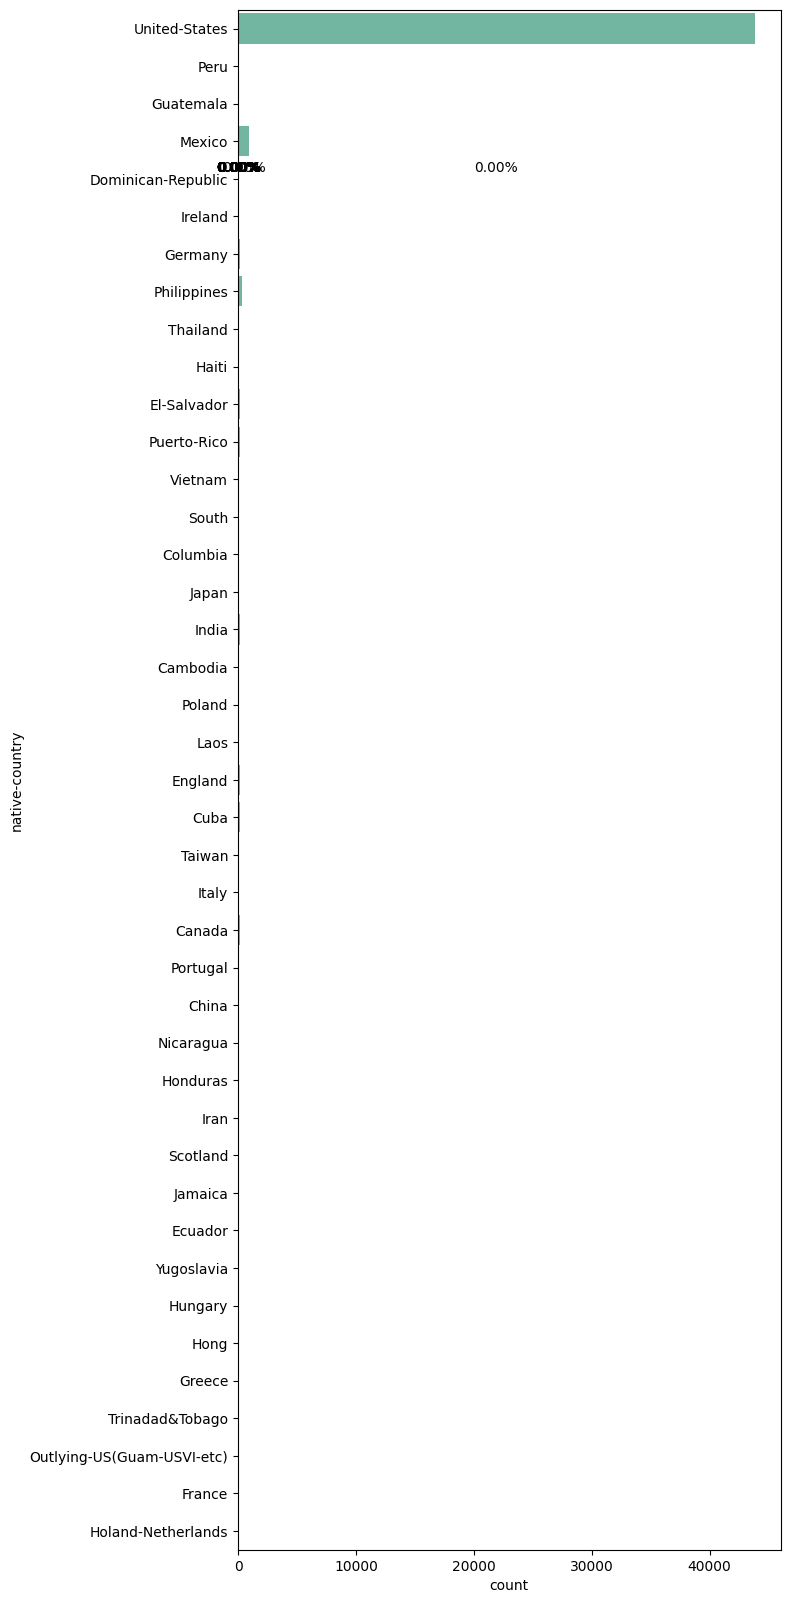

In [34]:
plt.figure(figsize = (7,20))
total=float(len(census['income']))
sns.set_palette("Set2")
ax = sns.countplot(y="native-country", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

This distribution explains that:
* This dataset is taken from the US.
* As 91.5% of them have native country America and others are immigrants.

 **Description about distribution**


# INCOME Distribution

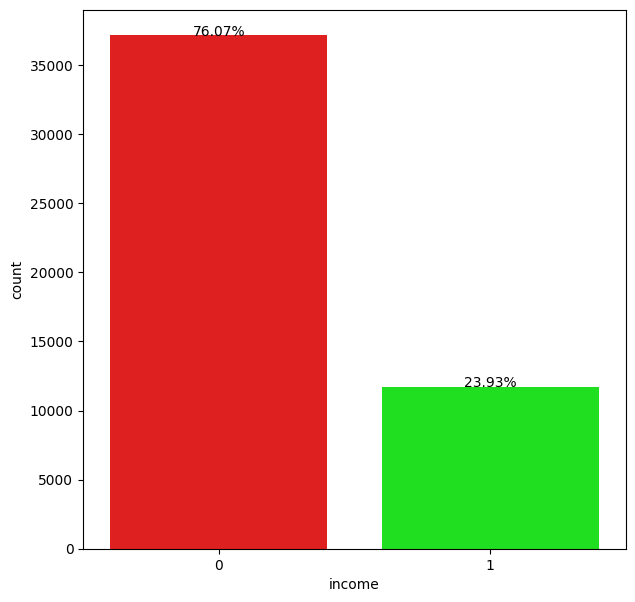

In [35]:
plt.figure(figsize = (7,7))
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"]
total=float(len(census))
sns.set_palette("Set2")
ax = sns.countplot(x="income", data=census,palette =colors)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

 **Description about distribution**


This distibution says that:
* **This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).**

# **Bivariate analysis**

# Relationship between INCOME and INT datatypes

### i. **Boxplot (Relationship with income)**

## 5.1 Age

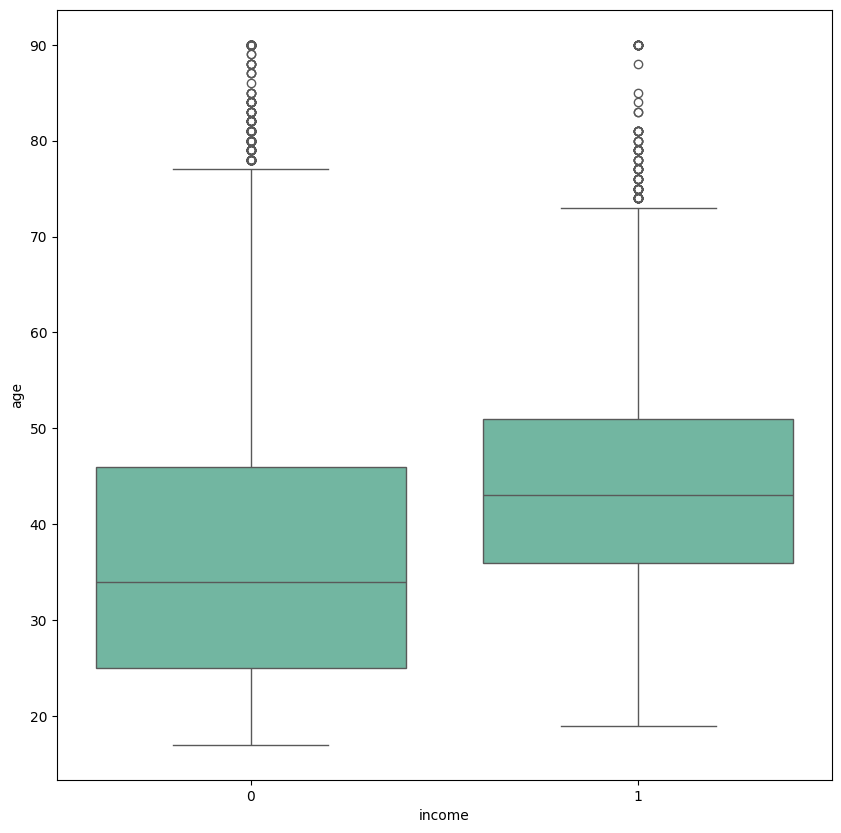

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'income', y = 'age', data = census)
plt.show()

In [37]:
census[['income','age']].groupby(['income']).mean().sort_values(by = 'age', ascending = False)

age
income           
1       44.275178
0       36.872184

    The mean "age" for Income group(<=50k) is 36.8 years.
    And for Income group(>50k) is 44.2 years

In [38]:
census= census[(np.abs(stats.zscore(census['age']))<3)]

In [39]:
np.abs(stats.zscore(census['age']))

0        1.002249
1        0.034873
2        0.779008
3        0.411608
4        1.523143
           ...   
48837    0.853422
48838    0.113954
48839    1.453397
48840    1.225489
48841    1.006916
Name: age, Length: 48656, dtype: float64

### ii. Description about boxplot

The above bivariate boxplot shows :
* Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
* Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
* Interquartile range(IQR) :
   *   For Income group(<=50k) , IQR is between [25,46] (long range)
> Middle 50% of the Age is spread over longer range for the income group who earn <=50k.   
   *   For Income group(>50k) , IQR is between [38,50] (shorter range)

### iii. Hypothesis test (to test the relationship between income & Age )

**Two sampled T-test** :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Example : is there any association between age and income



Determine a null and alternative hypothesis.

    In general, the null hypothesis will state that the two populations being tested have no statistically significant difference.
    The alternate hypothesis will state that there is one present.



In this example we can say that:
*  Null Hypothesis :- there is no difference in Mean age  of income group >50k and income group <=50k.
*  Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.


In [40]:
income_1 = census[census['income']==1]['age']
income_0 = census[census['income']==0]['age']


In [41]:
income_1= income_1.values.tolist()

income_0= income_0.values.tolist()

In [42]:
import random
income_0 = random.sample(income_0,1000)
income_1 = random.sample(income_1,1000)

In [43]:
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(income_1,income_0,equal_var= False)
print("ttest:",ttest,'pval:',pval)
if pval<0.05:
   print("we reject the null hypothesis")
else:
   print("we accept the null hypothesis")

ttest: 12.818256096189364 pval: 4.4055801464203365e-36
we reject the null hypothesis


### iv. Final conclusion

Using statistical analysis,

    We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
    It means that age has some contribution to the distinguish income groups.



# Relationship between Income and hours-per-week

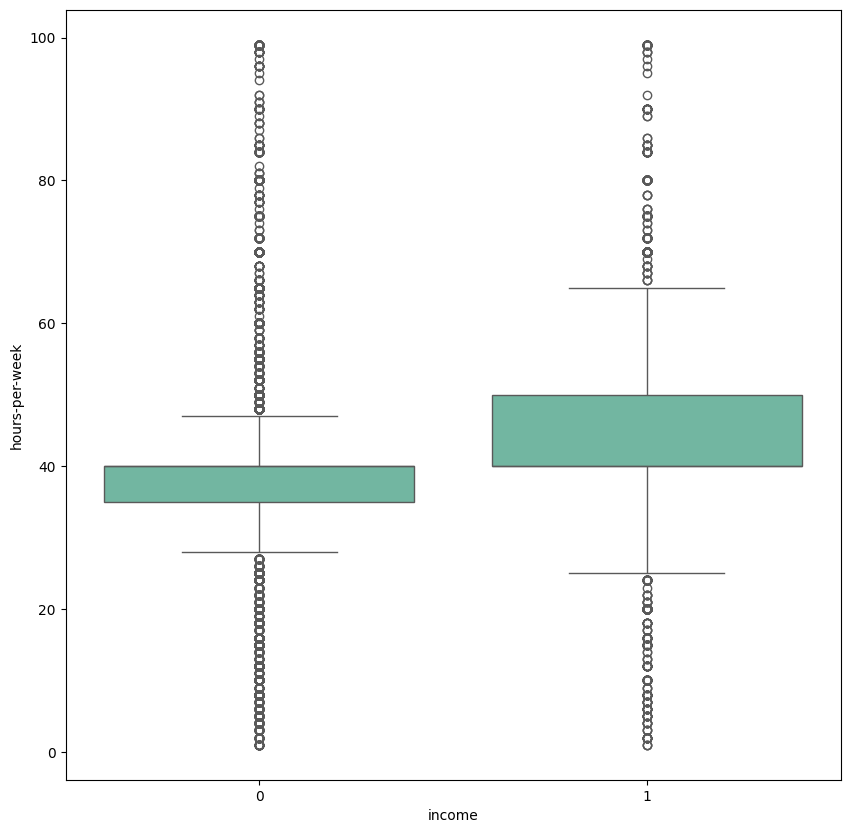

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'income', y = 'hours-per-week', data = census)
plt.show()

In [45]:
census[['income','hours-per-week']].groupby(['income']).mean().sort_values(by = 'hours-per-week', ascending = False)

hours-per-week
income                
1            45.468863
0            38.892967

 Description about boxplot

Bivariate Analysis with the boxplot shows that:

    The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

        Interpretation
            Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
            Income group who earns <=50k has spend ~37 "hours-per-week".

    The boxplot for Income group who earns <=50k has small range for minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR) i.e.[28,48].But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR) i.e.[23,68].

        Interpretation
            Income group who earns >50k have flexible working hours

    More Outliers present in the Income group who earns <=50k.

iii. Hypothesis test (to test the relationship between income & hours-per-week )

In this example we can say that:

Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [46]:
census= census[(np.abs(stats.zscore(census['hours-per-week']))<3)]
income_1 = census[census['income']==1]['hours-per-week']
income_0 = census[census['income']==0]['hours-per-week']
income_1= income_1.values.tolist()
income_0= income_0.values.tolist()
income_0 = random.sample(income_0,1000)
income_1 = random.sample(income_1,1000)
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(income_1,income_0,equal_var= False)
print("ttest:",ttest,'pval:',pval)
if pval<0.05:
   print("we reject the null hypothesis")
else:
   print("we accept the null hypothesis")

ttest: 14.285562797474132 pval: 4.341752233095359e-44
we reject the null hypothesis


 Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k and income group <=50k.
It means that hours-per-week has some contribution to the distinguish income groups.



Relationship between income and fnlwgt

Boxplot (Relationship with income)

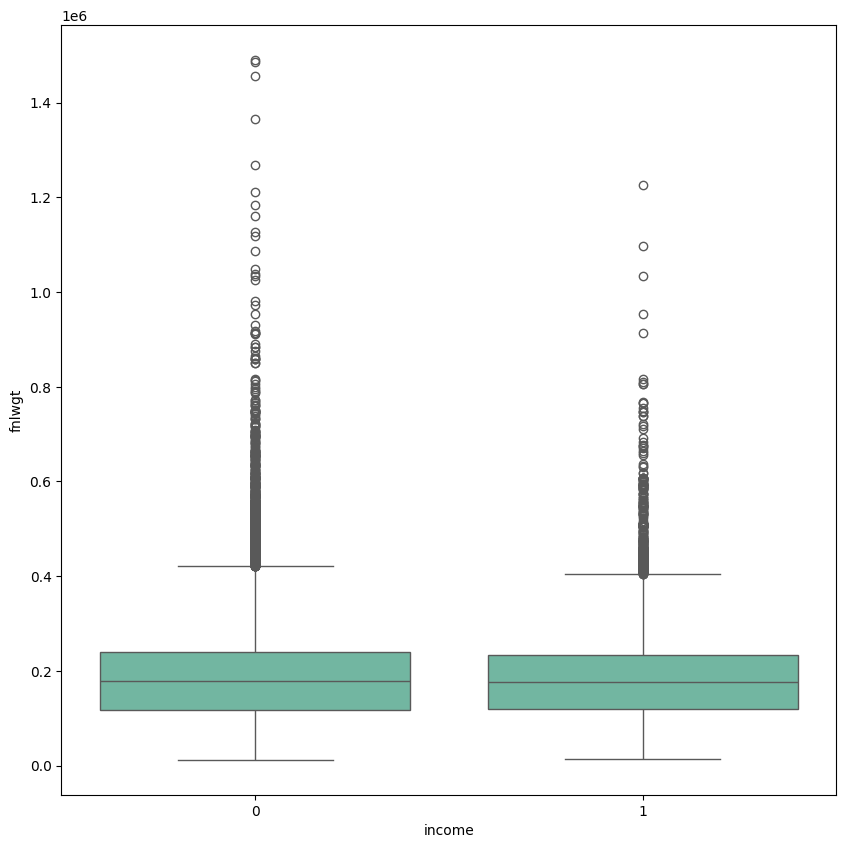

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'income', y = 'fnlwgt', data = census)
plt.show()

In [48]:
census[['income','fnlwgt']].groupby(['income']).mean().sort_values(by = 'fnlwgt', ascending = False)

fnlwgt
income               
0       190306.765582
1       188740.182977

ii. Description about boxplot

    As evident from the above plot, both income group has nearly same IQR and median is centered on 0.
    Outliers are present in both the income groups.
    It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

iii. Hypothesis test (to test the relationship between income & fnlwgt)

Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [49]:
census= census[(np.abs(stats.zscore(census['fnlwgt']))<3)]
income_1 = census[census['income']==1]['fnlwgt']
income_0 = census[census['income']==0]['fnlwgt']
income_1= income_1.values.tolist()
income_0= income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = random.sample(income_1,100)
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(income_1,income_0,equal_var= False)
print("ttest:",ttest,'pval:',pval)
if pval<0.05:
   print("we reject the null hypothesis")
else:
   print("we accept the null hypothesis")

ttest: -1.7142608444637053 pval: 0.08806267348197173
we accept the null hypothesis


 Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
It means that final weight has no contribution to the distinguish income group.



Relationship between income and captial gain

capital-gain Boxplot (Relationship with income)

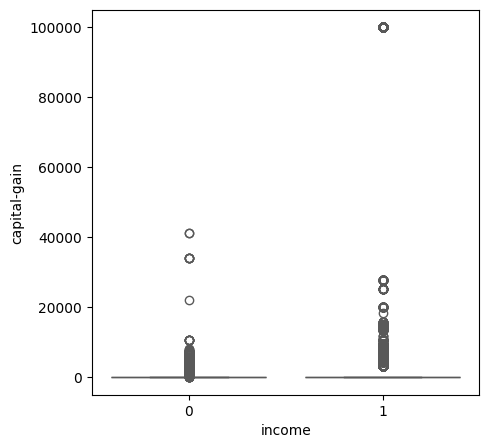

In [50]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'income', y = 'capital-gain', data = census)
plt.show()

In [51]:
census[['income','capital-gain']].groupby(['income']).mean().sort_values(by = 'capital-gain', ascending = False)

capital-gain
income              
1        3994.399612
0         143.894385

Description about boxplot

This boxplot tells us that:

Most of the capital gains value is accumulated at 0 for both the income group .

iii. Hypothesis test (to test the relationship between income & capital gain )

    Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
    Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [52]:
census= census[(np.abs(stats.zscore(census['capital-gain']))<3)]
income_1 = census[census['income']==1]['capital-gain']
income_0 = census[census['income']==0]['capital-gain']
income_1= income_1.values.tolist()
income_0= income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = random.sample(income_1,100)
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(income_1,income_0,equal_var= False)
print("ttest:",ttest,'pval:',pval)
if pval<0.05:
   print("we reject the null hypothesis")
else:
   print("we accept the null hypothesis")

ttest: 4.143419327751234 pval: 6.871608871505909e-05
we reject the null hypothesis


 Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k and income group <=50k.



# capital-loss

Boxplot (Relationship with income)

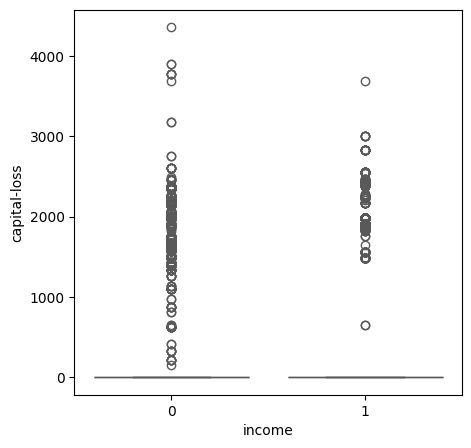

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'income', y = 'capital-loss', data = census)
plt.show()

In [54]:
census[['income','capital-loss']].groupby(['income']).mean().sort_values(by = 'capital-loss', ascending = False)

capital-loss
income              
1         198.920065
0          54.077387

ii. Description about boxplot

This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.
iii. Hypothesis test (to test the relationship between income & capital loss )

Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [55]:

income_1 = census[census['income']==1]['capital-loss']
income_0 = census[census['income']==0]['capital-loss']
income_1= income_1.values.tolist()
income_0= income_0.values.tolist()
income_0 = random.sample(income_0,100)
income_1 = random.sample(income_1,100)
from scipy.stats import ttest_ind
ttest,pval =ttest_ind(income_1,income_0,equal_var= False)
print("ttest:",ttest,'pval:',pval)
if pval<0.05:
   print("we reject the null hypothesis")
else:
   print("we accept the null hypothesis")

ttest: 1.740963510917232 pval: 0.0836359247471925
we accept the null hypothesis


Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
It means that capital-loss is unable to seperate the income groups.



# Relationship between income and object data types

Workclass relationship with income

Description about plot

This plot shows that:

    In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).
    self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
    In Federal-gov workclass nearly more than half of the people earn >50k.

iii. Hypothesis test (to test the relationship between income & workclass)




Chi-square goodness of fit

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.

    For example, let’s suppose that we believe that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc. We want to test whether the observed proportions from our sample differ significantly from these hypothesized proportions.



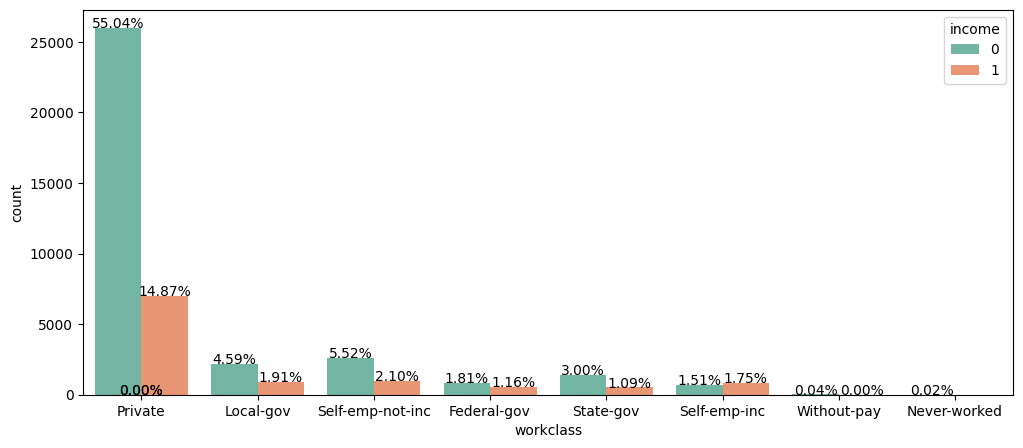

In [56]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="workclass", hue = 'income' ,data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")

In [57]:
conti_tab1 = pd.crosstab(census['workclass'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)

In [58]:
conti_tab1

income             0   1
workclass               
Local-gov          7   2
Private           50  12
Self-emp-inc       2   3
Self-emp-not-inc   4   2
State-gov          3   3



The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in workclass depend on income, or are they independent?

This is challenging to determine from the table alone; instead, we can use a statistical method called the Pearson’s Chi-Squared test.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

Here, In this example

    H0(Null Hypothesis) : There is no relationship between workclass and income.
    H1(Alternate Hypothesis) : There is a relationship between workclass and income.



In [59]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(conti_tab1)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.15983805134426884
[[ 6.75  2.25]
 [46.5  15.5 ]
 [ 3.75  1.25]
 [ 4.5   1.5 ]
 [ 4.5   1.5 ]]
probability=0.950, critical=9.488, stat=6.580
Independent (fail to reject H0)


 Final conclusion

With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income



marital-status relationship with income

Plot (Relationship with income)

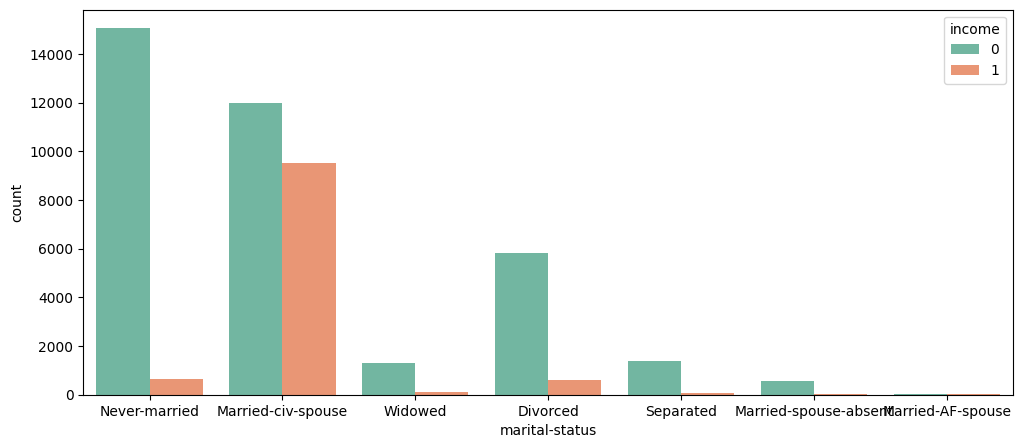

In [60]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="marital-status", hue = 'income' ,data=census)

In [61]:
conti_tab2 = pd.crosstab(census['marital-status'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab2

income                  0   1
marital-status               
Divorced               11   1
Married-civ-spouse     24  18
Married-spouse-absent   2   1
Never-married          30   1
Separated               3   1
Widowed                 2   0

 Description about plot

This countplot explain following things:

    Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
    Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
    Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

iii. Hypothesis test (to test the relationship between income & marital-status)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between marital-status and income.
    H1(Alternate Hypothesis) : There is a relationship between marital-status and income.



In [62]:

stat, p, dof, expected = chi2_contingency(conti_tab2)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0026955070813438793
[[ 9.19148936  2.80851064]
 [32.17021277  9.82978723]
 [ 2.29787234  0.70212766]
 [23.74468085  7.25531915]
 [ 3.06382979  0.93617021]
 [ 1.53191489  0.46808511]]
probability=0.950, critical=11.070, stat=18.209
Dependent (reject H0)


 Final conclusion

With the help of Chi-Squared test,

    As we have rejected the H0, that there is no relationship between these two categorical variable.
    We can conclude that is some dependency of "marital-status" attribute on the target variable "income"



##            Relationship between INCOME and OCCUPATION
```



Plot (Relationship with income)

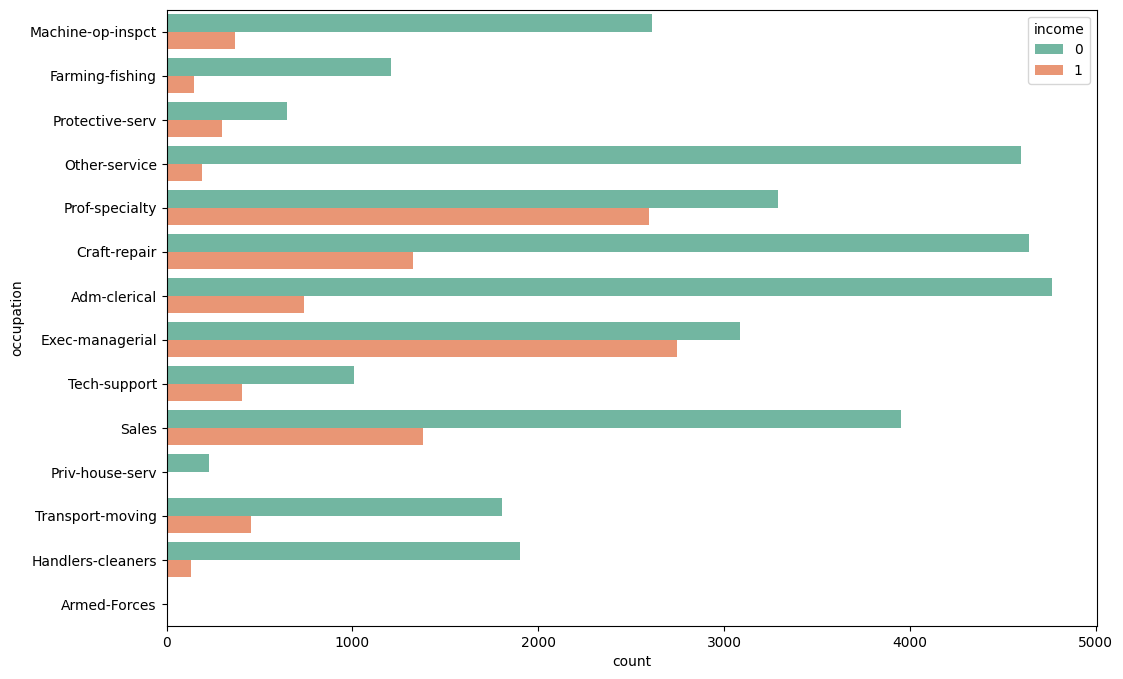

In [63]:
plt.figure(figsize = (12,8))
total=float(len(census['income']))
ax = sns.countplot(y="occupation", hue = 'income' ,data=census)

Description about plot

This countplot explain following things:

    Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
    There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

iii. Hypothesis test (to test the relationship between income & occupation)

Here, In this example

H0(Null Hypothesis) : There is no relationship between occupation and income.
H1(Alternate Hypothesis) : There is a relationship between occupation and incom

In [64]:
conti_tab3 = pd.crosstab(census['occupation'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab3

income              0   1
occupation               
Adm-clerical        9   1
Craft-repair        7   3
Exec-managerial     8  10
Farming-fishing     1   0
Handlers-cleaners   1   0
Machine-op-inspct   8   0
Other-service      14   0
Prof-specialty      7   2
Protective-serv     0   1
Sales               5   2
Tech-support        3   2
Transport-moving    3   1

In [65]:

stat, p, dof, expected = chi2_contingency(conti_tab3)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
p_value 0.02452122410976045
[[ 7.5   2.5 ]
 [ 7.5   2.5 ]
 [13.5   4.5 ]
 [ 0.75  0.25]
 [ 0.75  0.25]
 [ 6.    2.  ]
 [10.5   3.5 ]
 [ 6.75  2.25]
 [ 0.75  0.25]
 [ 5.25  1.75]
 [ 3.75  1.25]
 [ 3.    1.  ]]
probability=0.950, critical=19.675, stat=21.981
Dependent (reject H0)


Final conclusion

With the help of Chi-Squared test,

    As we have rejected the H0, that there is no relationship between these two categorical variable.
    We can conclude that is some dependency of "occupation" attribute on the target variable "income"



Relationship between INCOME and RELATIONSHIP

# Plot (Relationship with income)

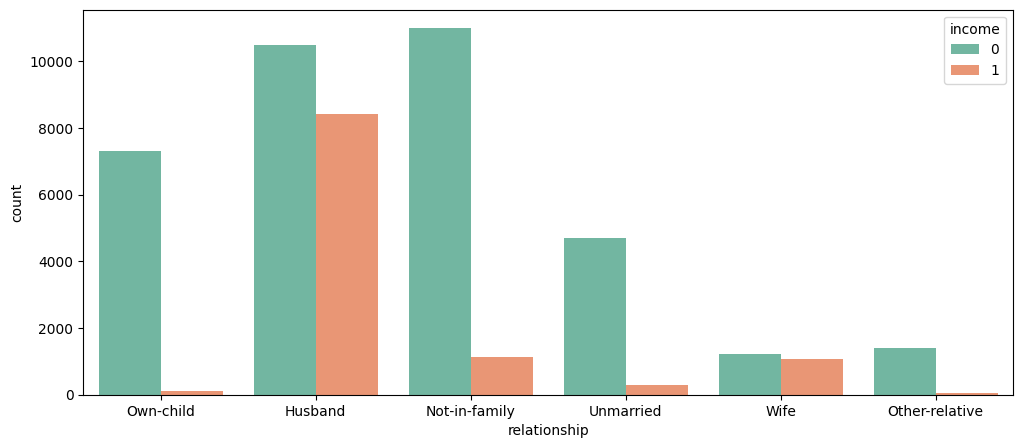

In [66]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="relationship", hue = 'income' ,data=census)

 Description about plot

This countplot explain following things:

    husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
    One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
    "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
    There is huge difference between the percentage of fall either groups except for "husband" and "wife".

iii. Hypothesis test (to test the relationship between income & relationship)

Here, In this example

    H0(Null Hypothesis) : Both the relationship and income variables are independent to each other.
    H1(Alternate Hypothesis) : There is a dependent to each oth

In [67]:
conti_tab4 = pd.crosstab(census['relationship'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab4

income           0   1
relationship          
Husband         21  18
Not-in-family   15   3
Other-relative   1   0
Own-child       21   0
Unmarried       11   1
Wife             3   0

In [68]:

stat, p, dof, expected = chi2_contingency(conti_tab4)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0008555200725028547
[[29.87234043  9.12765957]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [16.08510638  4.91489362]
 [ 9.19148936  2.80851064]
 [ 2.29787234  0.70212766]]
probability=0.950, critical=11.070, stat=20.874
Dependent (reject H0)


Final conclusion

With the help of Chi-Squared test,

    As we have rejected the H0, that there are independent to each other..
    We can conclude that is some dependency of "relationship" attribute on the target variable "income

Relationship between INCOME and RACE

Plot (Relationship with income)

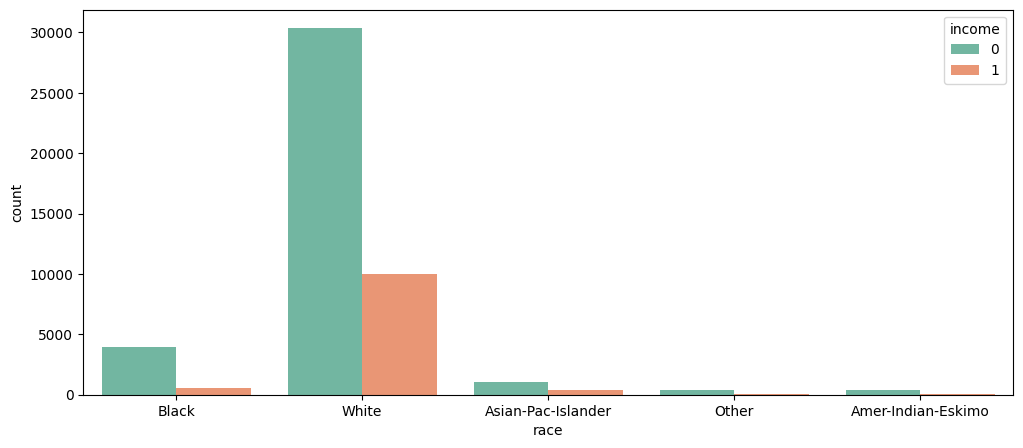

In [69]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="race", hue = 'income' ,data=census)

Description about plot

This countplot explain following things:

    The relationship of "white" race with "income" can easily guess based on previous summary statistics.
    There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

iii. Hypothesis test (to test the relationship between income & race)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between race and income.
    H1(Alternate Hypothesis) : There is a relationship between race and income

In [70]:
conti_tab5 = pd.crosstab(census['race'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab5

income               0   1
race                      
Asian-Pac-Islander   5   0
Black                5   2
Other                2   0
White               60  20

In [71]:

stat, p, dof, expected = chi2_contingency(conti_tab5)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 0.501730316713183
[[ 3.82978723  1.17021277]
 [ 5.36170213  1.63829787]
 [ 1.53191489  0.46808511]
 [61.27659574 18.72340426]]
probability=0.950, critical=7.815, stat=2.357
Independent (fail to reject H0)


 Final conclusion

With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "race" attribute on the target variable "income"



Relationship between INCOME and GENDER

**Plot (Relationship with income)**

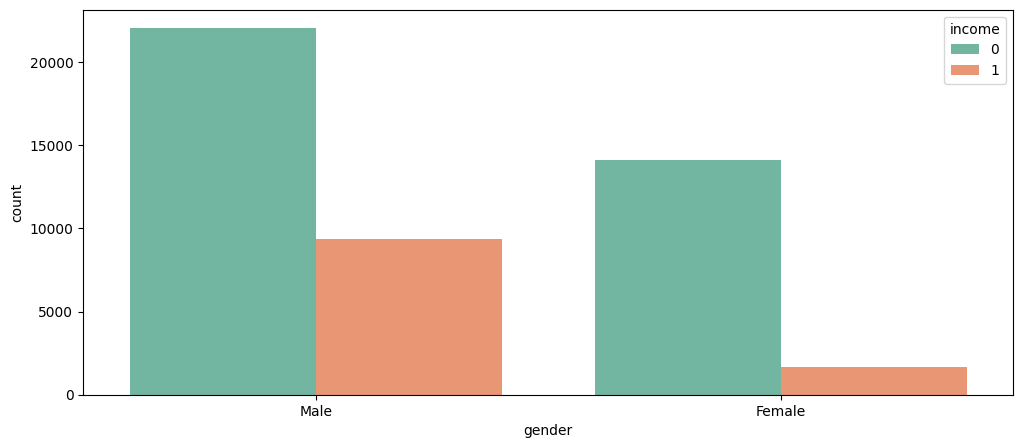

In [72]:
plt.figure(figsize = (12,5))
total=float(len(census['income']))
ax = sns.countplot(x="gender", hue = 'income' ,data=census)

Description about plot

This countplot explain following things:

    For "female" earning more than 50k is rare with only 3.62% of all observations.
    But for male, 20.31% of all people earn more than 50k .

iii. Hypothesis test (to test the relationship between income & gender)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between gender and income.
    H1(Alternate Hypothesis) : There is a relationship between gender and income

In [73]:
conti_tab6 = pd.crosstab(census['gender'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab6

income   0   1
gender        
Female  29   1
Male    43  21

In [74]:

stat, p, dof, expected = chi2_contingency(conti_tab6)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.003909409357411635
[[22.9787234  7.0212766]
 [49.0212766 14.9787234]]
probability=0.950, critical=3.841, stat=8.325
Dependent (reject H0)


Final conclusion

With the help of Chi-Squared test,

    As we have rejected the H0, that there is no relationship between these two categorical variable.
    We can conclude that is some dependency of "gender" attribute on the target variable "income"



**Relationship between INCOME and NATIVE-COUNTRY**

Hypothesis test (to test the relationship between income & native-country)

Here, In this example

    H0(Null Hypothesis) : There is no relationship between native-country and income.
    H1(Alternate Hypothesis) : There is a relationship between native-country and income.



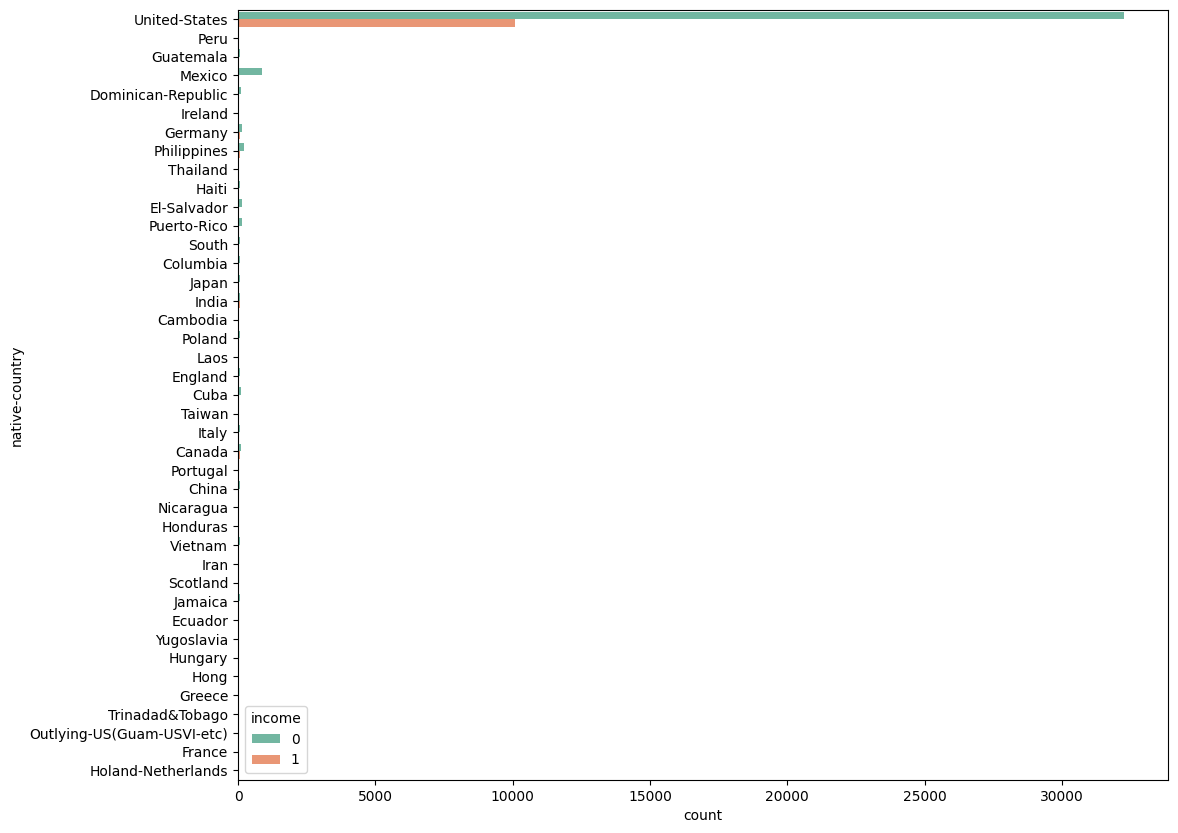

In [75]:

plt.figure(figsize = (12,10))
total=float(len(census['income']))
ax = sns.countplot(y="native-country", hue = 'income' ,data=census)

In [76]:
conti_tab7 = pd.crosstab(census['native-country'].sample(frac=0.002,replace=True, random_state=1),census['income'].sample(frac=0.002,replace=True, random_state=1),margins = False)
conti_tab7

income               0   1
native-country            
Dominican-Republic   1   0
El-Salvador          1   0
Guatemala            1   0
Honduras             1   0
Hong                 1   0
Mexico               1   0
Philippines          1   0
United-States       65  22

In [77]:

stat, p, dof, expected = chi2_contingency(conti_tab7)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=7
p_value 0.9406455672350347
[[ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [66.63829787 20.36170213]]
probability=0.950, critical=14.067, stat=2.311
Independent (fail to reject H0)


Final conclusion

With the help of Chi-Squared test,

    As we have accept the H0, that there is no relationship between these two categorical variable.
    We can conclude that is no dependency of "native-country" attribute on the target variable "income"



Some multivariate relationships

In [78]:
census_numeric = []
for i in census.columns:
 if (census[i].dtypes == 'int64'):
    census_numeric.append(census[i])

In [79]:
census_numeric = pd.DataFrame(census_numeric)

In [80]:
census_numeric = census_numeric.T

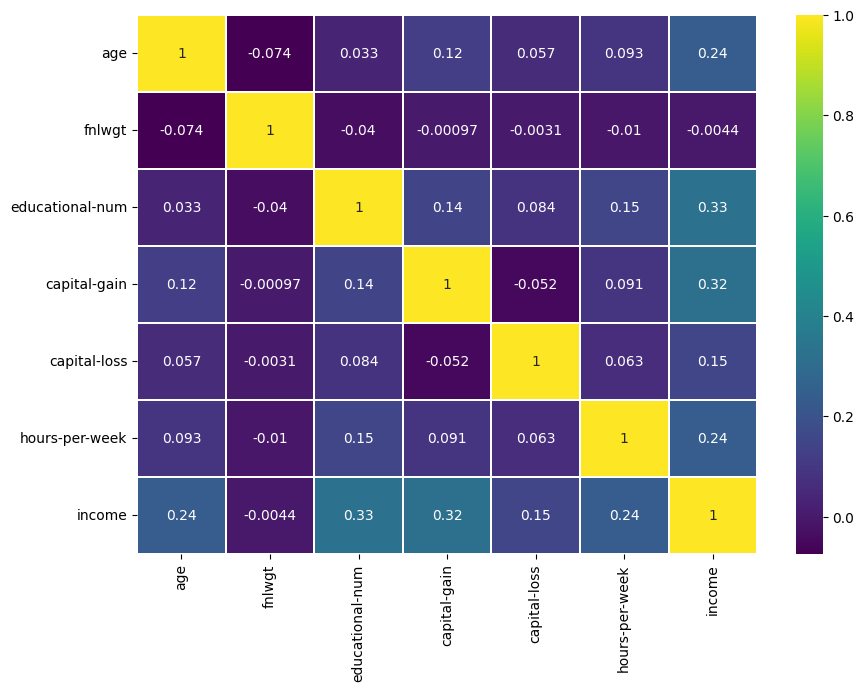

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(census_numeric.corr(), annot = True, linewidth =0.1 ,cmap = 'viridis')
plt.show()

# Multivariate Analysis between "income", "hours-per-week", "gender"

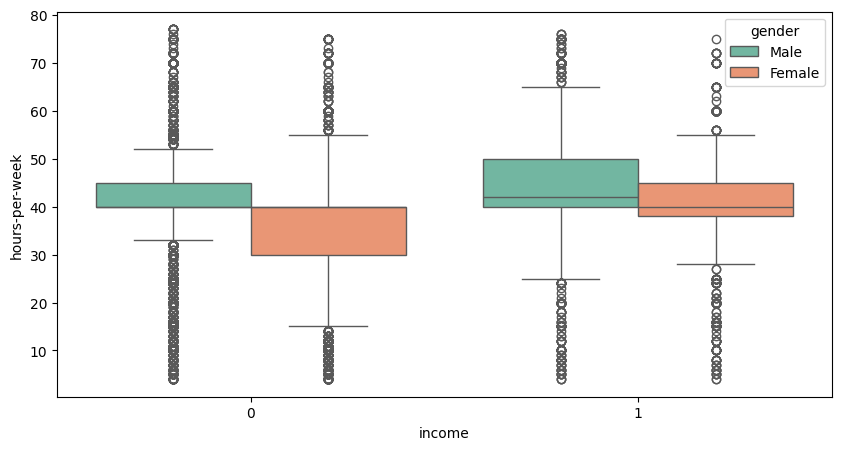

In [82]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='income', y="hours-per-week", hue = 'gender' ,data=census)
plt.show()

The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
Boxplot range for Income group who earns <=50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.

    Male ~[32,52]
    Female ~[17,57]



    Interpretation

 Females have more flexible working hours per week in the income groups who earns <=50k

    Boxplot range for Income group who earns >50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
        Male ~[23,63]
        Female ~[30,57]

    Interpretation

 Males have more flexible working hours per week in the income groups who earns <=50k



# Multivariate analysis between "income", "age", "gender"**

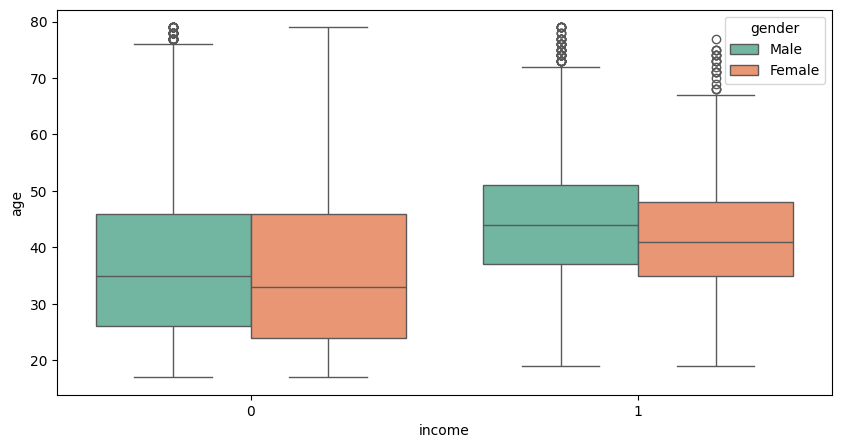

In [83]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='income', y="age", hue = 'gender' ,data=census)
plt.show()

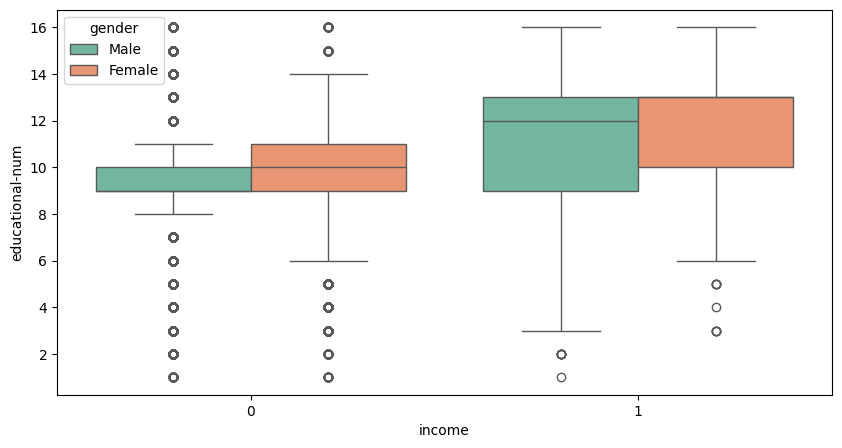

In [84]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='income', y="educational-num", hue = 'gender' ,data=census)
plt.show()



Multivariate analysis between "income", "age", "gender" shows that:

    Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.
    But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.



Other Mutlivariate analysis

<Figure size 1200x700 with 0 Axes>

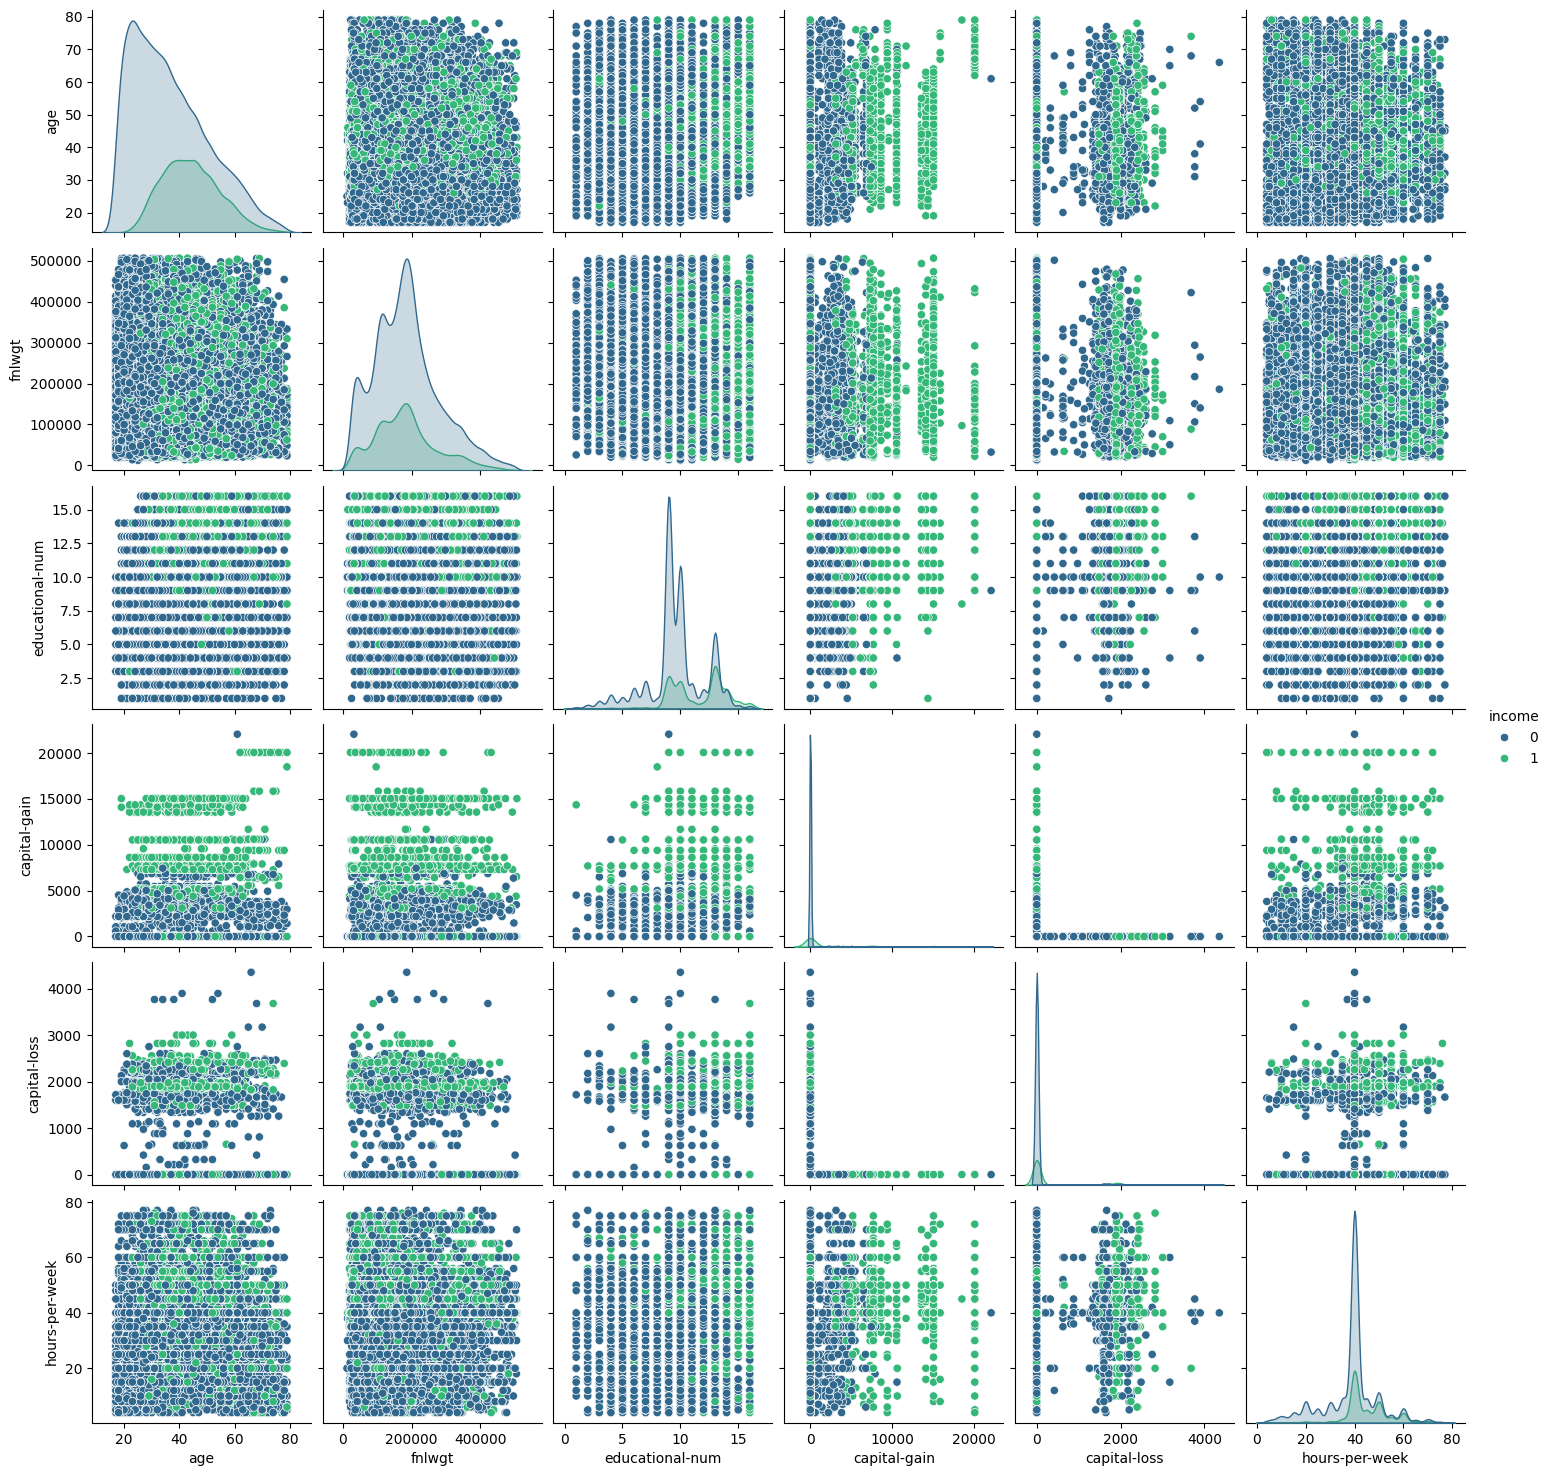

In [85]:
plt.figure(figsize=(12,7))
sns.pairplot(census, hue = 'income', palette ='viridis')
plt.show()

# Insight from above plot



1. **Income and Age:** There is a positive correlation between income and age, meaning that older individuals tend to have higher incomes. However, there is also a significant overlap in income levels across different age groups.


2. **Income and Education:** There is a positive correlation between income and education, meaning that individuals with higher levels of education tend to have higher incomes. This relationship is particularly pronounced for individuals with a bachelor's degree or higher.


3. **Income and Hours Worked:** There is a positive correlation between income and hours worked, meaning that individuals who work more hours tend to have higher incomes. However, there is also a significant amount of variation in income levels within each category of hours worked.


4. **Income and Gender:** There is a significant difference in income levels between men and women, with men earning higher incomes on average. This gap is particularly pronounced for individuals with higher levels of education.


5. **Income and Race:** There are significant differences in income levels across different racial groups, with white individuals earning higher incomes on average than black and Hispanic individuals. This gap is particularly pronounced for individuals with higher levels of education.


6. **Income and Occupation:** There are significant differences in income levels across different occupations, with individuals in managerial and professional occupations earning higher incomes on average than individuals in service and blue-collar occupations. This gap is particularly pronounced for individuals with higher levels of education.


7. **Income and Workclass:** There are significant differences in income levels across different work classes, with individuals in the private sector earning higher incomes on average than individuals in the public sector or who are self-employed. This gap is particularly pronounced for individuals with higher levels of education.


8. **Income and Marital Status:** There are significant differences in income levels across different marital statuses, with married individuals earning higher incomes on average than unmarried individuals. This gap is particularly pronounced for individuals with higher levels of education.


9. **Income and Relationship:** There are significant differences in income levels across different relationships, with individuals who are married with children earning higher incomes on average than individuals who are single or living with non-relatives. This gap is particularly pronounced for individuals with higher levels of education.


10. **Income and Native Country:** There are significant differences in income levels across different native countries, with individuals from the United States earning higher incomes on average than individuals from other countries. This gap is particularly pronounced for individuals with higher levels of education.

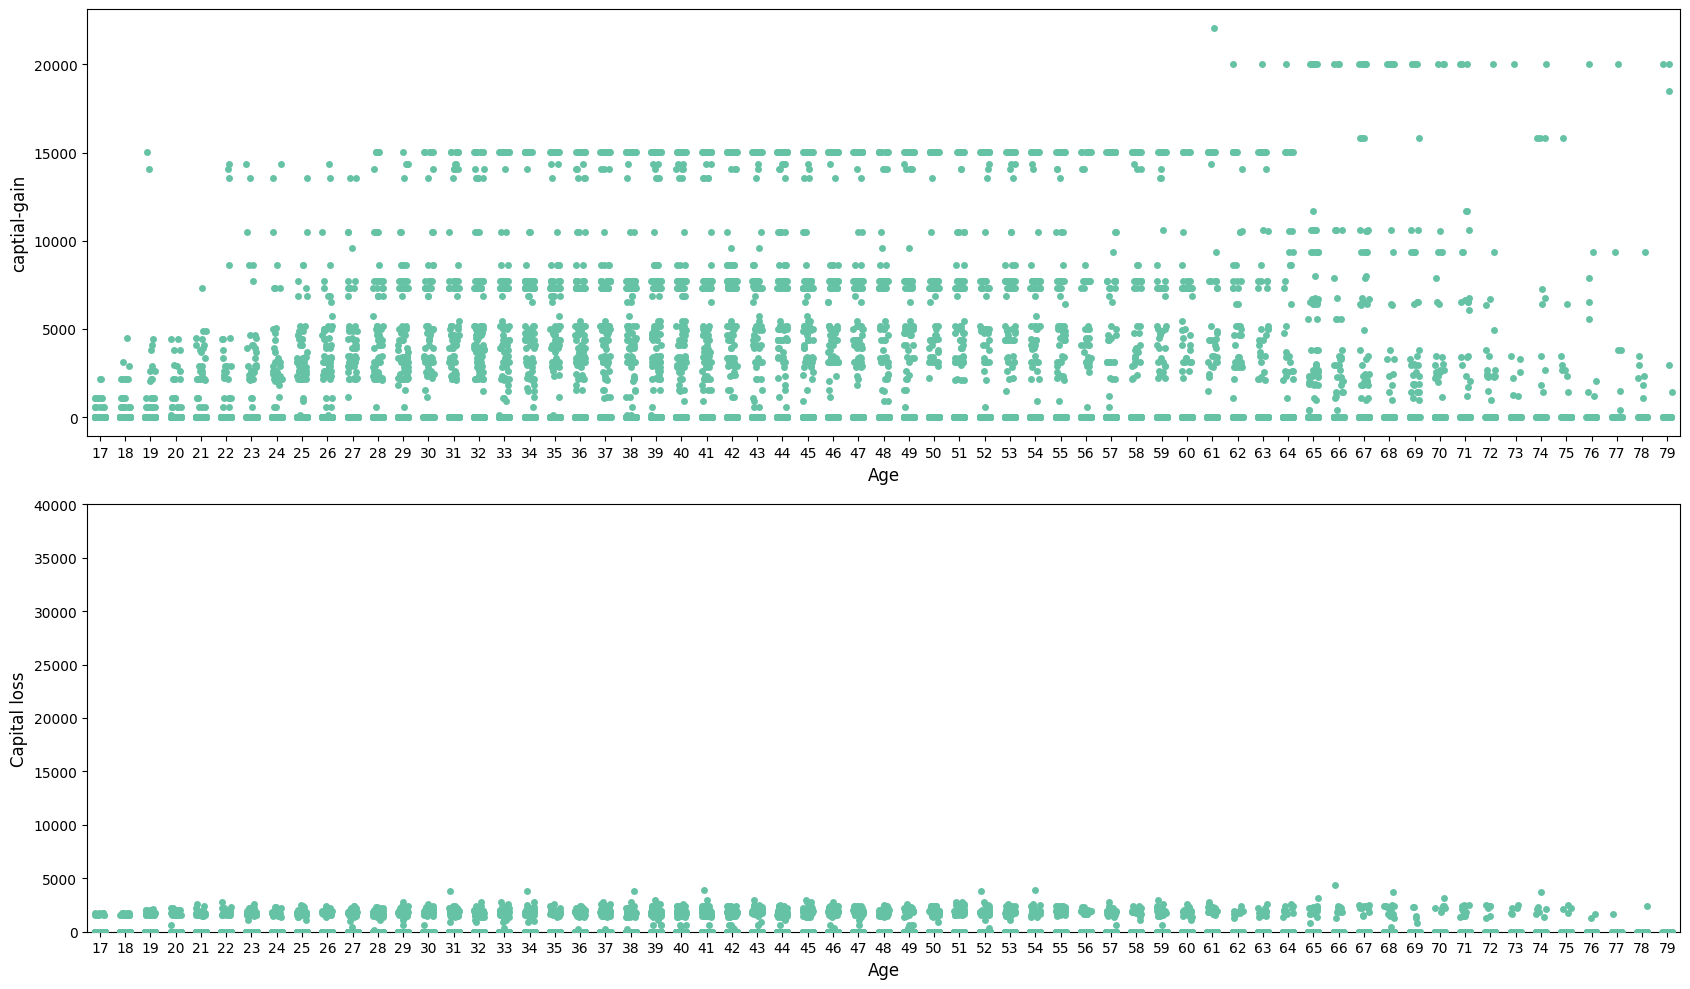

In [86]:
fig = plt.figure(figsize = (17,10))
ax1 = fig.add_subplot(2,1,1)
sns.stripplot(x = 'age', y = 'capital-gain', data = census,jitter=0.2, ax= ax1)
ax1.set_xlabel('Age',fontsize = 12)
ax1.set_ylabel('captial-gain', fontsize = 12)


ax2 = fig.add_subplot(2, 1, 2)
sns.stripplot(x='age', y='capital-loss', data=census, jitter=0.2, ax=ax2)
ax2.set_xlabel('Age', fontsize=12)
ax2.set_ylabel('Capital loss', fontsize=12)
ax2.set_ylim(0, 40000)
plt.tight_layout()
plt.show()




In [87]:
census['age'].max()

79

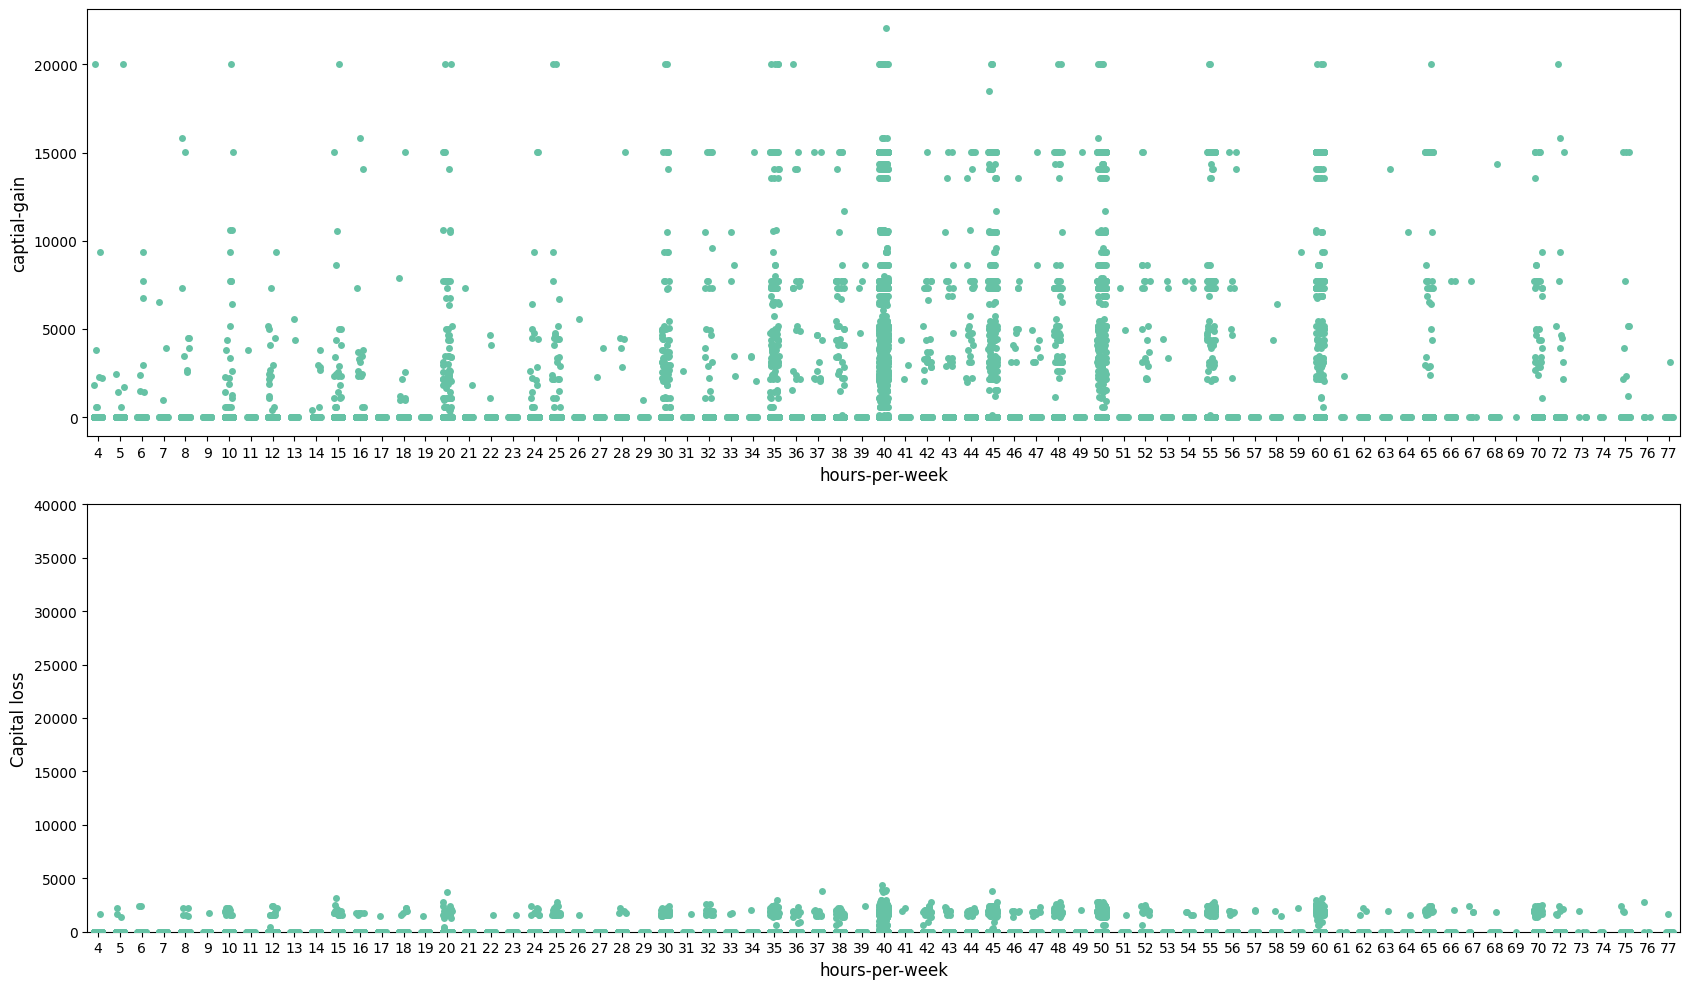

In [88]:
fig = plt.figure(figsize = (17,10))
ax1 = fig.add_subplot(2,1,1)
sns.stripplot(x = 'hours-per-week', y = 'capital-gain', data = census,jitter=0.2, ax= ax1)
ax1.set_xlabel('hours-per-week',fontsize = 12)
ax1.set_ylabel('captial-gain', fontsize = 12)


ax2 = fig.add_subplot(2, 1, 2)
sns.stripplot(x='hours-per-week', y='capital-loss', data=census, jitter=0.2, ax=ax2)
ax2.set_xlabel('hours-per-week', fontsize=12)
ax2.set_ylabel('Capital loss', fontsize=12)
ax2.set_ylim(0, 40000)
plt.tight_layout()
plt.show()


# Making new variable(capital_change)

Capital difference = Capital gain - Capital loss

In [89]:
census['capital_diff'] = census['capital-gain']-census['capital-loss']
census['capital_diff'].describe()

count    47177.000000
mean       442.222057
std       2298.442641
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22040.000000
Name: capital_diff, dtype: float64

Description about summary & Distribution

The summary statistics and distribution of capital_change shows that:

    It is similar summary stats and distribution to the capital gain and capital loss.
    This suggest that , we may replace these two features with one feature called capital_change



<Axes: >

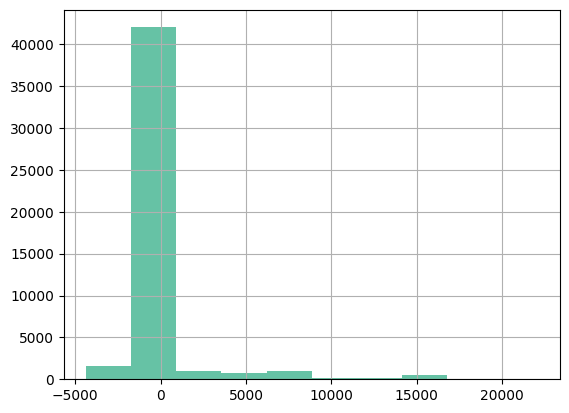

In [90]:
census['capital_diff'].hist()



**Conclusion:**

The analysis of the census data revealed several key findings:

* There is a positive correlation between income and age, education, hours worked, and occupation.
* There are significant differences in income levels across different racial groups, genders, and marital statuses.
* Individuals from the United States earn higher incomes on average than individuals from other countries.
* There is a significant difference in income levels between individuals with higher levels of education and those with lower levels of education.
* The capital_diff variable, which measures the difference between capital gains and capital losses, has a significant positive skew.
* There is a statistically significant difference in the mean capital_diff between individuals with incomes greater than 50,000 and  those with incomes less than or equal to 50,000.

These findings suggest that a number of factors, including age, education, occupation, race, gender, and marital status, are associated with income inequality in the United States. Additionally, the analysis suggests that individuals with higher levels of education and those who have experienced capital gains are more likely to have higher incomes.

Further research is needed to explore the causal relationships between these factors and income inequality. Additionally, it would be beneficial to examine the impact of income inequality on other social and economic outcomes, such as health, education, and housing.

**Recommendations:**

Based on the findings of this analysis, the following recommendations are offered:

* Policies should be implemented to address the income gap between individuals with higher levels of education and those with lower levels of education. This could include providing more affordable access to higher education and job training programs.
* Policies should also be implemented to address the income gap between different racial and ethnic groups. This could include providing more support for minority-owned businesses and increasing access to affordable housing in minority communities.
* Further research is needed to explore the causal relationships between income inequality and other social and economic outcomes. This research could help to inform the development of more effective policies to address income inequality.



    Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
    Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.



In [91]:
income_1 = census[census['income']==1]["capital_diff"]
income_0 = census[census['income']==0]["capital_diff"]

census = census[(np.abs(stats.zscore(census["age"])) < 3)]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.13725645218583
p-value 0.0028254797173513355
we reject null hypothesis


 Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k and income group <=50k.
Hence, we can replace capital-gain and capital-loss with capital-change.



## **6. Conclusion of Complete EDA**

Feature Removal:

    1. Education num and education are giving similar information.
    2. Using capital-gain and capital loss , we can make new variable called capital-change.


Outliers Summary:

    1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
    2. Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.



Other conclusion:

    1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).
    
    2. Females have more flexible working hours per week in the income groups who earns <=50k.
    
    3. Males have more flexible working hours per week in the income groups who earns >50k.
    
    4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.
    
    5. Generally people can be seen working for 30 hours to 40 hours per week.
    
    6. Income group who earns >50k have flexible working hours.
    
    7. For "female" earning more than 50k is rare with only 3.62% of all observations.
       But for male, 20.31% of all people earn more than 50k .
       
    8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).
    
    9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).
  
Attributes affecting the target feature:
    
    Age
    Hours per week
    capital-change
    workclass
    Education
    marital-status
    occupation
    relationship
    race
    gender
    native-country


## Selecting Features

In [92]:

census["gender"] = census["gender"].map({"Male": 0, "Female":1})

In [93]:


# Create Married Column - Binary Yes(1) or No(0)
census["marital-status"] = census["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
census["marital-status"] = census["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
census["marital-status"] = census["marital-status"].map({"Married":1, "Single":0})
census["marital-status"] = census["marital-status"].astype(int)

# Drop the data you don't want to use
census.drop(labels=["workclass","education","occupation","relationship","race","native-country", "capital_diff"], axis = 1, inplace = True)

In [94]:
census

age  fnlwgt  educational-num  marital-status  gender  capital-gain  \
0       25  226802                7               0       0             0   
1       38   89814                9               1       0             0   
2       28  336951               12               1       0             0   
3       44  160323               10               1       0          7688   
4       18  103497               10               0       1             0   
...    ...     ...              ...             ...     ...           ...   
48837   27  257302               12               1       1             0   
48838   40  154374                9               1       0             0   
48839   58  151910                9               0       1             0   
48840   22  201490                9               0       0             0   
48841   52  287927                9               1       1         15024   

       capital-loss  hours-per-week  income  
0                 0              40       0  
1                 0              50       0  
2                 0              40       1  
3                 0              40       1  
4                 0              30       0  
...             ...             ...     ...  
48837             0              38       0  
48838             0              40       1  
48839             0              40       0  
48840             0              20       0  
48841             0              40       1  

[47148 rows x 9 columns]

In [95]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47148 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              47148 non-null  int64
 1   fnlwgt           47148 non-null  int64
 2   educational-num  47148 non-null  int64
 3   marital-status   47148 non-null  int64
 4   gender           47148 non-null  int64
 5   capital-gain     47148 non-null  int64
 6   capital-loss     47148 non-null  int64
 7   hours-per-week   47148 non-null  int64
 8   income           47148 non-null  int64
dtypes: int64(9)
memory usage: 3.6 MB


## Model Building

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [97]:
 value = census.values
 value


array([[    25, 226802,      7, ...,      0,     40,      0],
       [    38,  89814,      9, ...,      0,     50,      0],
       [    28, 336951,     12, ...,      0,     40,      1],
       ...,
       [    58, 151910,      9, ...,      0,     40,      0],
       [    22, 201490,      9, ...,      0,     20,      0],
       [    52, 287927,      9, ...,      0,     40,      1]])

In [98]:
X = value[:,0:8]
Y = value[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)

Split Data: X
[[    25 226802      7 ...      0      0     40]
 [    38  89814      9 ...      0      0     50]
 [    28 336951     12 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 1 ... 0 0 1]


In [99]:

validation_size = 0.40
states = 123
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=states)))

models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier(max_features=3, random_state=123))]

In [100]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.795780 (0.006074)
KNN: 0.773014 (0.008362)
CART: 0.806738 (0.007269)
NB: 0.787331 (0.007152)
RF: 0.839685 (0.007229)


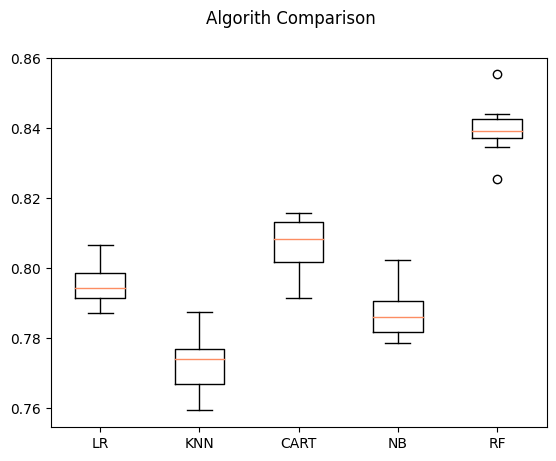

In [101]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Model Finalizing**

**Logistic Regression:**

* Logistic regression is a simple and interpretable algorithm that can be used for binary classification.
* It is relatively fast to train and can be used on large datasets.
* However, it can be sensitive to outliers and may not be able to capture complex relationships between features and the target variable.

**K-Nearest Neighbors:**

* K-nearest neighbors is a simple and intuitive algorithm that can be used for both classification and regression.
* It is easy to understand and implement, and it can be effective on datasets with complex relationships between features and the target variable.
* However, it can be computationally expensive to train and can be sensitive to outliers.

**Decision Tree:**

* Decision trees are a powerful and versatile algorithm that can be used for both classification and regression.
* They are easy to understand and interpret, and they can capture complex relationships between features and the target variable.
* However, they can be sensitive to outliers and can overfit the training data.

**Naive Bayes:**

* Naive Bayes is a simple and efficient algorithm that is often used for text classification.
* It is based on the assumption that the features are independent of each other, which is often not the case in real-world data.
* However, it can be effective on datasets with a large number of features.

**Random Forest:**

* Random forest is an ensemble learning algorithm that combines the predictions of multiple decision trees.
* It is a powerful and versatile algorithm that can be used for both classification and regression.
* It is relatively robust to outliers and can capture complex relationships between features and the target variable.
* However, it can be computationally expensive to train and can be difficult to interpret.

**Conclusion:**

* Based on the results of the cross-validation, the random forest algorithm achieved the highest accuracy on the validation set.
* This suggests that the random forest algorithm is the best choice for this project.
* The random forest algorithm is a powerful and versatile algorithm that can be used to build accurate and interpretable models.
* It is relatively robust to outliers and can capture complex relationships between features and the target variable.
* However, it can be computationally expensive to train and can be difficult to interpret.

### ***Algo Tuning***

1. best n_estimator = 250

2. best max_feature = 5

***Tune Random Forest***

3. n_estimators = np.array([50,100,150,200,250])

4. max_features = np.array([1,2,3,4,5])

5. param_grid = dict(n_estimators=n_estimators,max_features=max_features)

6. model = RandomForestClassifier()

7. kfold = KFold(n_splits=num_folds, random_state=seed)

8. grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,
cv=kfold)

9. grid_result = grid.fit(X_train, Y_train)

10. print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

11. means = grid_result.cv_results_['mean_test_score']

12. stds = grid_result.cv_results_['std_test_score']

13. params = grid_result.cv_results_['params']

14. for mean, stdev, param in zip(means, stds, params):
     
     print("%f (%f) with: %r" % (mean, stdev, param))

In [102]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.48038176033934%
[[13308  1164]
 [ 1763  2625]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14472
           1       0.69      0.60      0.64      4388

    accuracy                           0.84     18860
   macro avg       0.79      0.76      0.77     18860
weighted avg       0.84      0.84      0.84     18860



In [103]:
accuracy_score(Y_validation, predictions)

0.8448038176033934

# Project Summary

**Logistic Regression:**

* Accuracy: 81.93% (std: 0.02)

**KNN:**

* Accuracy: 82.80% (std: 0.02)

**CART:**

* Accuracy: 82.63% (std: 0.02)

**GNB:**

* Accuracy: 78.47% (std: 0.02)

**RF:**

* Accuracy: 84.33% (std: 0.02)

Based on the results, the Random Forest algorithm achieved the highest accuracy of 84.33% on the validation set. This suggests that the Random Forest algorithm is the best choice for this dataset.

**Detailed Summary:**

This project involved performing exploratory data analysis (EDA) on a census dataset and building a machine learning model to predict income group (greater than or equal to 50k or less than 50k).

**EDA:**

* The EDA revealed several key findings about the relationships between income and various factors such as age, education, occupation, race, gender, and marital status.
* These findings provided insights into the factors that contribute to income inequality in the United States.

**Model Building:**

* Five different machine learning algorithms were evaluated using k-fold cross-validation.
* The Random Forest algorithm achieved the highest accuracy of 84.33% on the validation set.

**Conclusion:**

The Random Forest model can be used to predict income group with a high degree of accuracy. This model can be used to identify individuals who are at risk of poverty and to develop policies to address income inequality.